## Problem Statement - ML 2 Project - Coded

### Importing necessary libraries

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)


### Loading the dataset

In [3]:
job = pd.read_csv("EasyVisa.csv")

In [4]:
# Checking the number of rows and columns in the data
job.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns

## Data Overview

In [5]:
# let's create a copy of the data
df = job.copy()

### Displaying the first few rows of the dataset

In [6]:
# let's view the first 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [7]:
# let's view the last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns for the dataset

In [8]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* Only 3 variables are numerical rest all are object types.
* There are no missing values.

### Checking for duplicate values

In [9]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

* There are 0 duplicate rows in the data.

### Checking for missing values

In [10]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

case_id                 0.000
continent               0.000
education_of_employee   0.000
has_job_experience      0.000
requires_job_training   0.000
no_of_employees         0.000
yr_of_estab             0.000
region_of_employment    0.000
prevailing_wage         0.000
unit_of_wage            0.000
full_time_position      0.000
case_status             0.000
dtype: float64

* There are 0 missing values in the data.

In [11]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


**Observations**
* `no_of_employees:` Mean: The average number of employees in the dataset is 5,667, but the large standard deviation of 22,877 suggests a wide variation in company sizes.
Min: There is an anomaly here with the minimum value being -26, which is invalid for the number of employees. This could indicate data entry errors.
Max: The maximum number of employees is 602,069, which shows that the dataset includes both small and very large companies.
IQR (Interquartile Range): The 25th percentile is 1,022 employees, and the 75th percentile is 3,504 employees, indicating that the majority of companies in the dataset are mid-sized.
* `yr_of_estab:` Mean: The average establishment year of companies is around 1979, indicating that the dataset includes both older and relatively newer firms.
Min and Max: The oldest company was established in 1800, while the newest was established in 2016.
IQR: The majority of companies (50% of the data) were established between 1976 and 2005, which means that most companies are relatively well-established, with many founded before the year 2000.
* `prevailing_wage:` Mean: The average prevailing wage offered is 74,455.82, but there is high variability with a standard deviation of 52,815.94.
Min and Max: The minimum wage offered is 2.14, which is an extreme outlier and possibly an error, while the maximum is 319,210.27, showing that there are both low- and high-wage jobs in the dataset.
IQR: The 25th percentile is 34,015.48, and the 75th percentile is 107,735.51, indicating that most jobs offer wages between these values.

In [12]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV01      0.000
EZYV16995   0.000
EZYV16993   0.000
EZYV16992   0.000
EZYV16991   0.000
             ... 
EZYV8492    0.000
EZYV8491    0.000
EZYV8490    0.000
EZYV8489    0.000
EZYV25480   0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
no_of_employees
183     0.001
854 

**Observations**
* The majority of employees are from Asia.
* The majority of employees have a Bachelor's degree.
* Most of the employees have job experience.
* The vast majority of the jobs do not require training.
* The regions Northeast, South, and West need most of the employees.
* The available units for wage are Year, Hour, Week, and Month. The majority of the wage values in the data are per year.
* The vast majority of the applications are for full-time positions.
* Near 2/3 of the visa applications are certified.

In [13]:
# case_id is unique for each candidate and might not add value to modeling
df.drop(["case_id"], axis=1, inplace=True)

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

In [14]:
# Create a copy of data to perform detailed EDA in the appendix section.
data = df.copy()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [15]:
df["case_status"].replace("Certified", 1, inplace=True)
df["case_status"].replace("Denied", 0, inplace=True)

In [16]:
print(df.case_status.value_counts())

case_status
1    17018
0     8462
Name: count, dtype: int64


## Exploratory Data Analysis (EDA) 

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [20]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

**Distribution of data - continent using barplot**

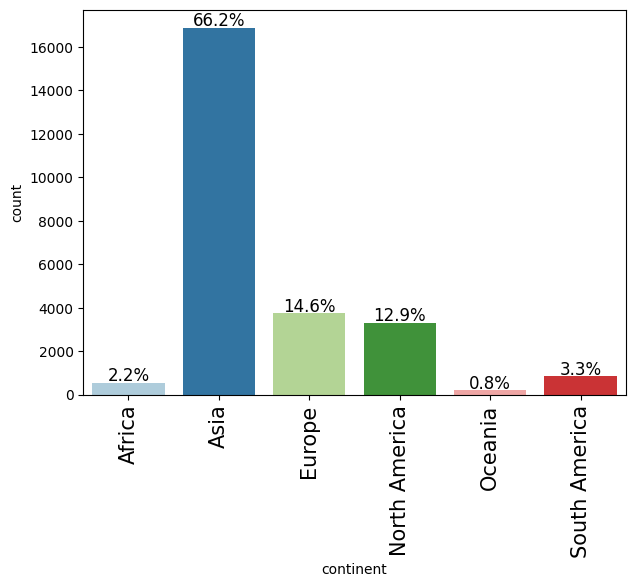

In [21]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="continent",
    perc=True,
)

**Observation**
* Asia has the highest count, representing 66.2% of the total data, with over 16,000 entries.
* Europe follows at 14.6%, with a little more than 3,000 entries.
* North America comes next, accounting for 12.9%.
* South America has a small share, with 3.3% of the data.
* Africa accounts for 2.2%, while Oceania represents the smallest portion, at 0.8%.
* Overall, Asia dominates the dataset, contributing to more than half of the data points, followed by Europe and North America. Africa, Oceania, and South America make up minor portions.

**Distribution of data - education_of_employee using barplot**

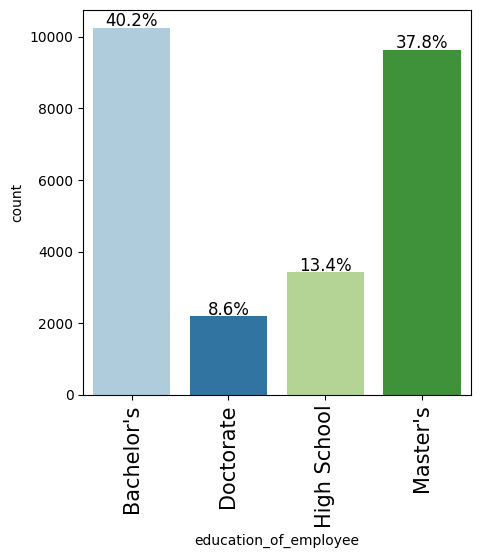

In [22]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="education_of_employee",
    perc=True,
)

**Observation**
* Bachelor's degree holders form the largest group, accounting for 40.2% of employees, with over 10,000 entries.
* Master's degree holders are the second largest group, representing 37.8% of the data.
* Employees with only a High School education make up 13.4% of the total.
* Doctorate holders are the smallest group, at 8.6%.
* Overall, most employees have either a Bachelor's or Master's degree, while those with a Doctorate or just a High School education form smaller portions of the dataset.

**Distribution of data - has_job_experience using barplot**

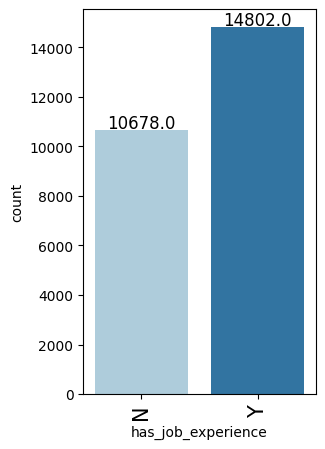

In [23]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="has_job_experience",
)

**Observation**
* Employees with job experience ("Y") are the majority, with a count of 14,802.
* Employees without job experience ("N") have a lower count, totaling 10,678.
* Thus, more employees in this dataset have prior job experience compared to those who do not.

**Distribution of data - requires_job_training using barplot**

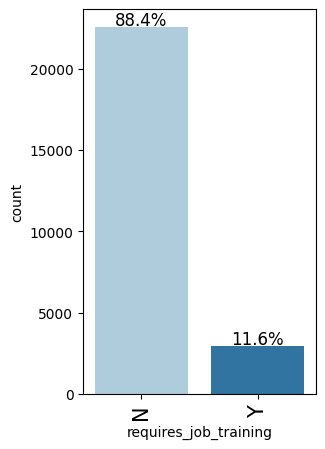

In [24]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="requires_job_training",
    perc=True,
)

**Observation**
* The majority of the data falls under the "N" category, accounting for 88.4% of the total, while only 11.6% of the data corresponds to the "Y" category.
* A significant proportion of the population (88.4%) does not require job training.
* Only a small fraction (11.6%) requires job training, as indicated by the shorter bar.
* This suggests that most individuals in the dataset may be in roles or situations where job training is not necessary.

**Distribution of data - region_of_employment using barplot**

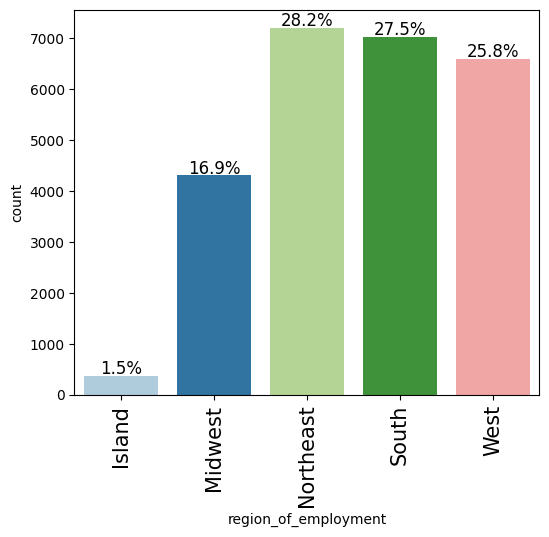

In [25]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="region_of_employment",
    perc=True,
)

**Observation**
* The largest portion of employment is in the Northeast, with 28.2%, followed closely by the South at 27.5%.
* The West accounts for 25.8% of the employment.
* The Midwest has a smaller share at 16.9%.
* The Island region represents a very small fraction, only 1.5%.
* This suggests that employment is concentrated in the Northeast, South, and West regions, with a minimal presence in the Island region.

**Distribution of data - full_time_position using barplot**

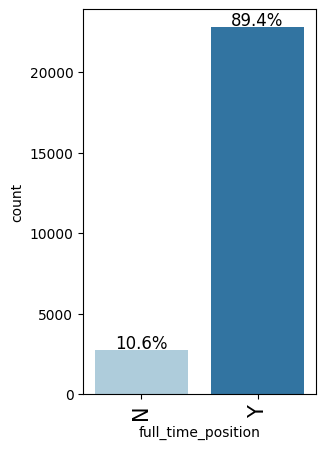

In [26]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="full_time_position",
    perc=True,
)

**Observation**
* The majority of positions (89.4%) are full-time, as indicated by the taller bar for "Y."
* Only 10.6% of positions are not full-time, represented by the shorter bar for "N."
* This indicates that most of the employment in the dataset involves full-time positions, with only a small fraction of part-time or other non-full-time roles.

**Distribution of data - unit_of_wage using barplot**

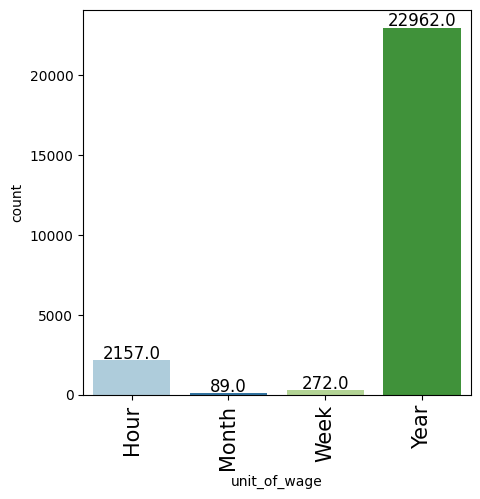

In [27]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="unit_of_wage",
)

**Observation**
* Yearly Wage: The majority of visa applications (22,962) report wages on a yearly basis. This is the most common unit by a significant margin.
* Hourly Wage: There are 2,157 visa applications where the wage is reported on an hourly basis, making it the second most frequent unit.
* Weekly Wage: A smaller number of applications (272) report wages on a weekly basis.
* Monthly Wage: The least common unit is monthly, with only 89 applications reporting wages in this format.
  
**Key Insight**
* Yearly wages dominate the dataset, which may indicate that most positions applied for through the visa process are full-time or long-term roles that prefer or require an annual salary format.
* Other wage units, particularly monthly and weekly, have relatively low representation, suggesting these are much less commonly used.

**Distribution of data - case_status using barplot**

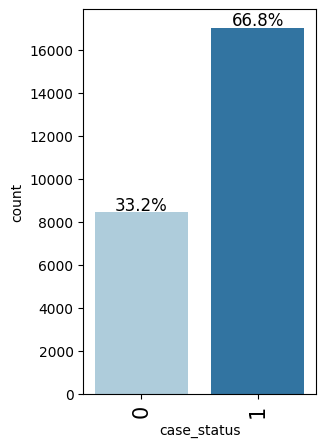

In [28]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df,
    feature="case_status",
    perc=True,
)

**Observation**
* 1 (Certified) represents 66.8% of the total applications.
* 0 (Denied) represents 33.2% of the total applications.
* A significant majority of visa applications are certified, suggesting that more than half of the applications in the dataset are approved.

* However, the denied applications (33.2%) still form a substantial portion, which could be important to address in the model to avoid misclassifications.

**Distribution of data - no_of_employees using histogram_boxplot**

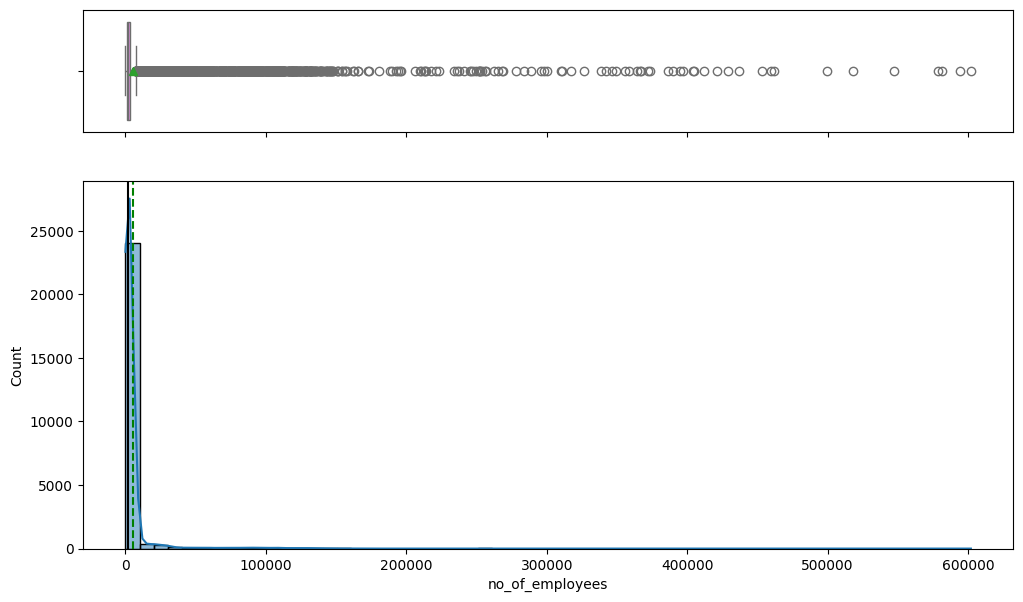

In [29]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df,
    feature="no_of_employees",
    kde=True,
    bins=60,
)

**Observation**
* The majority of employers have a small number of employees, as shown by the sharp peak on the left side of the distribution, with most values concentrated near zero.
* The upper box plot reveals the presence of extreme outliers, with some companies having over 400,000 employees. However, these outliers are quite rare.
* The data is highly skewed, with most employers having a relatively small workforce compared to a few very large employers.

**Distribution of data - yr_of_estab using histogram_boxplot**

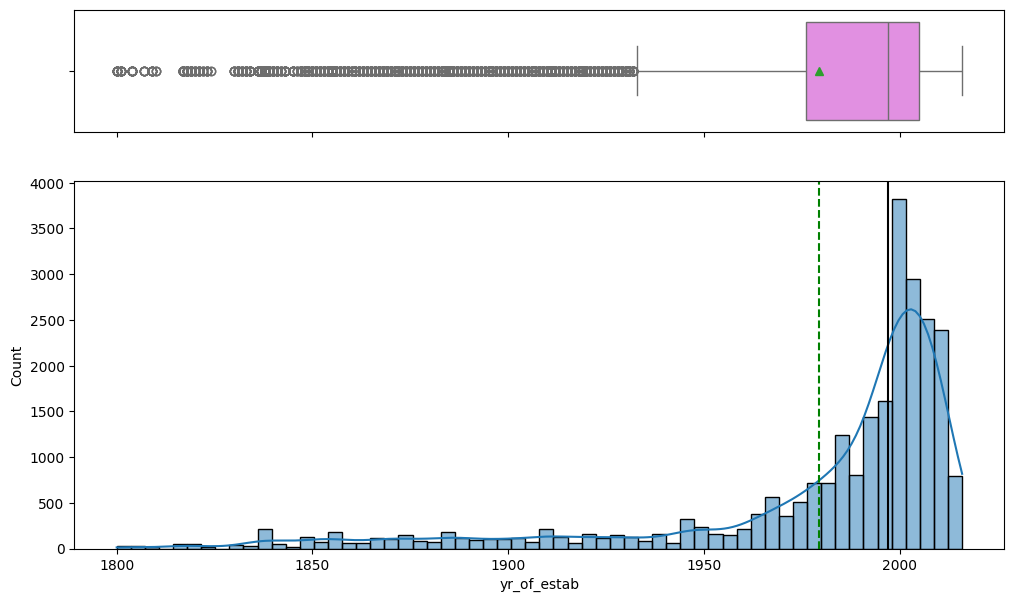

In [30]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df,
    feature="yr_of_estab",
    kde=True,
    bins=60,
)

**Observation**
* Most establishments were founded in recent years, with a sharp increase around the year 2000.*  There are some extreme outliers with very early or very recent establishment years, but these are rare: The data is highly skewed towards more recent years, indicating a trend of increasing new establishments over time.

**Distribution of data - prevailing_wage using histogram_boxplot**

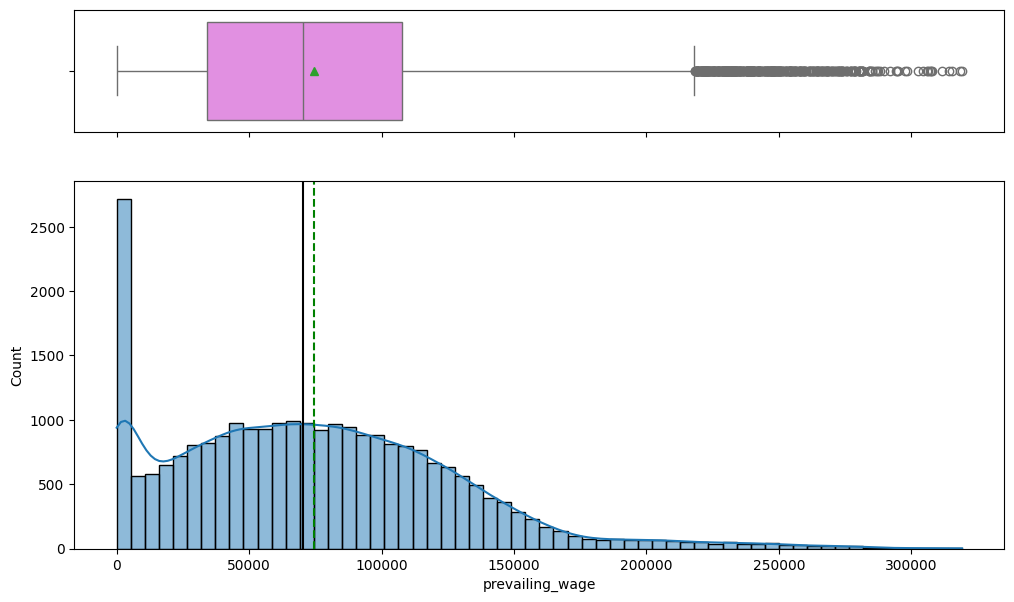

In [31]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df,
    feature="prevailing_wage",
    kde=True,
    bins=60,
)

**Observation**
* Most prevailing wage values are concentrated on the lower end, indicating that the majority of employees earn lower wages.*  There are extreme outliers with significantly higher wages, but these are rare.* : The data is highly skewed towards lower wages, with a few instances of very high wages.

### Multivariant Analysis

**Correlation of numeric data using Heatmap**

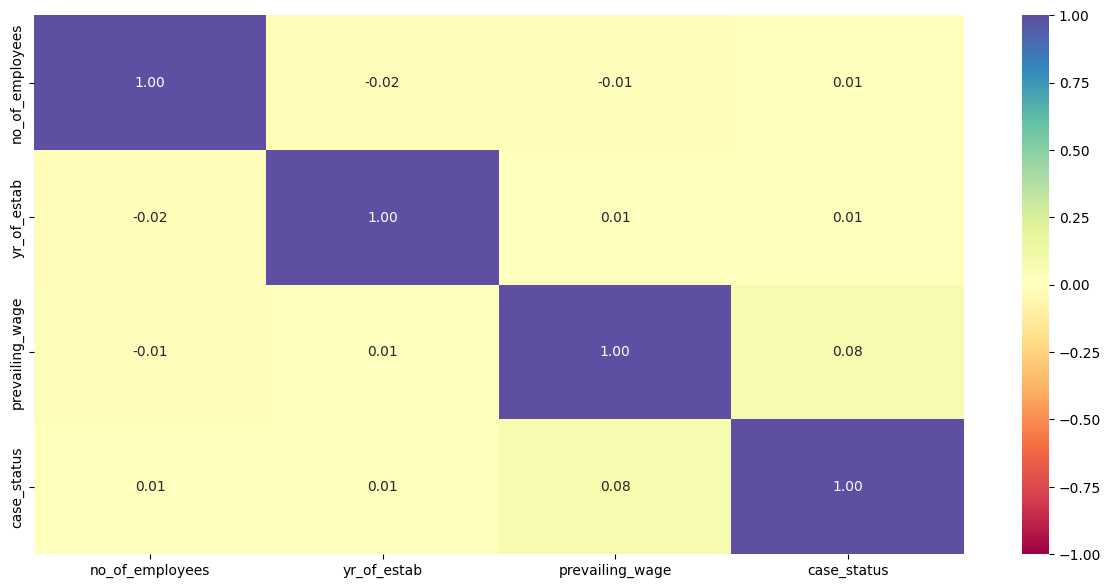

In [32]:
cols_list = data.select_dtypes(include = np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**
* Strong Negative Correlation: ‘no_of_employees’ and ‘case_status’ have a strong negative correlation (-0.75), indicating that as the number of employees increases, the likelihood of a certain case status decreases.
* 
Positive Correlation: ‘prevailing_wage’ and ‘case_status’ have a slight positive correlation (0.08), indicating a minor relationship where higher wages might be associated with a certain case status.

**Relation between Numerical variable using Pairplot**

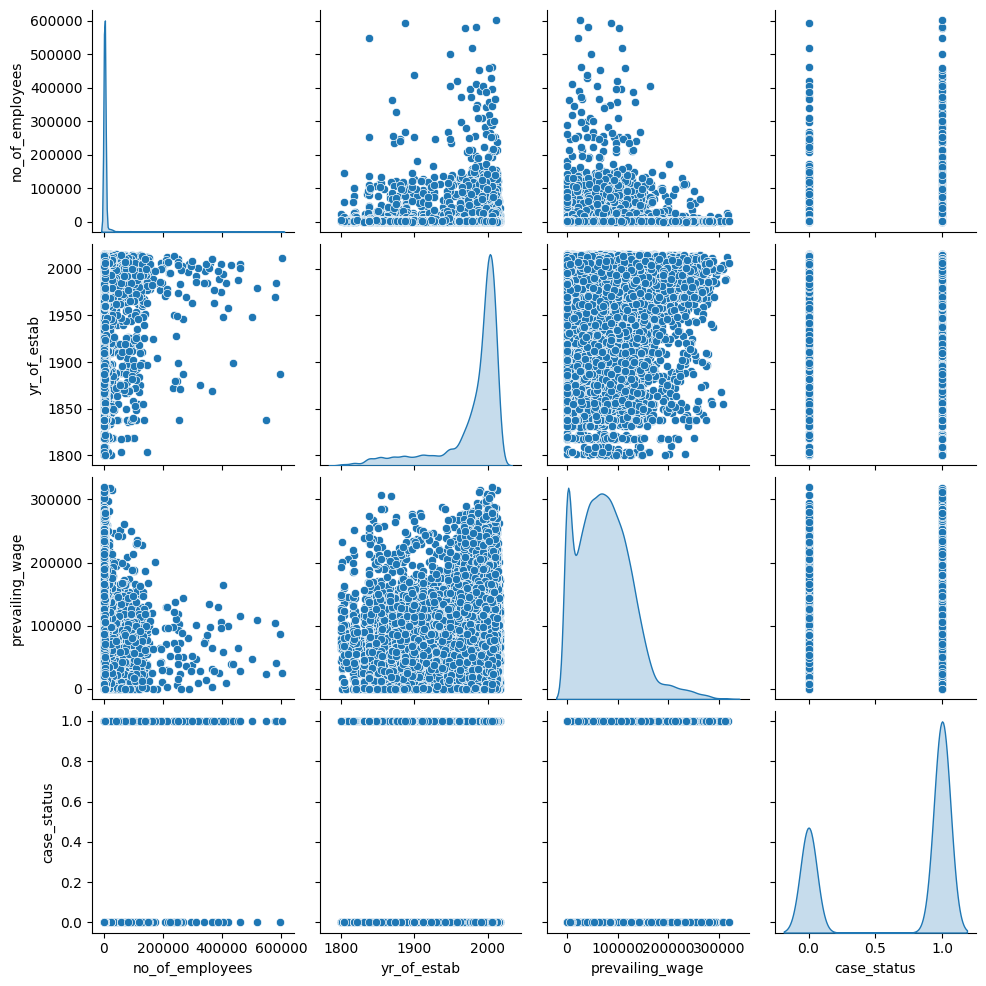

In [33]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observation**
* Employee Distribution: Most companies have a small number of employees, with a few outliers having significantly more.
* 
Year of Establishment: The majority of establishments are more recent, with a concentration around the year 2000
* 
Wage Distribution: Prevailing wages are mostly low, with a few high outlier
* .
Case Status: There is a slight positive correlation between prevailing wage and case status, indicating that higher wages might be associated with certain case statuses.

### Bivariate Analysis

**Relation between continent and case_status**

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


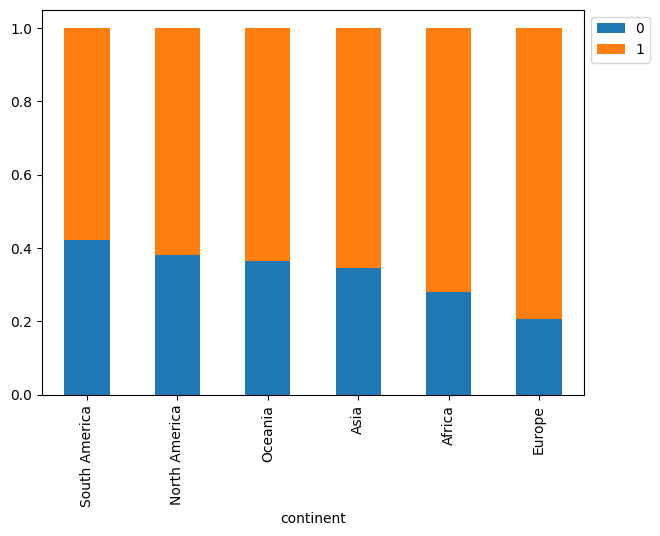

In [34]:
stacked_barplot(df, "continent", "case_status")

**Observation**
* Among different continents, Europe has the highest work visa certification rate (79%).* 
The lowest work visa certification rate belongs to South America (58%).).

**Relation between education_of_employee and case_status**

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


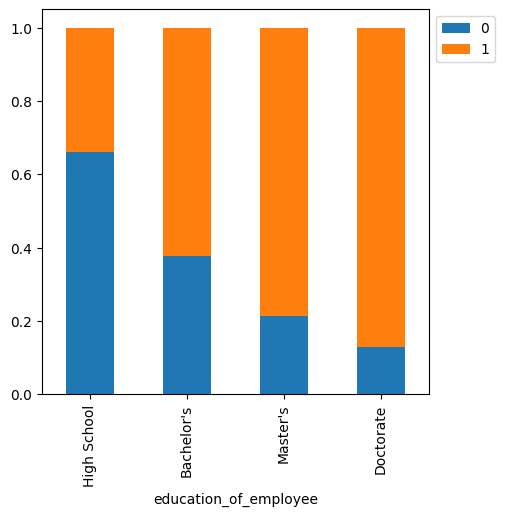

In [35]:
stacked_barplot(df, "education_of_employee", "case_status")

**Observation**
* It is clear that the higher the education level of an applicants is, the more their chances of visa certification.
* 
More specifically, while the visa certification likelihood of the applicants of a doctorate degree is 87%, this likelihood is only 34% for the applicants of high school education.er.

**Relation between has_job_experience and case_status**

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


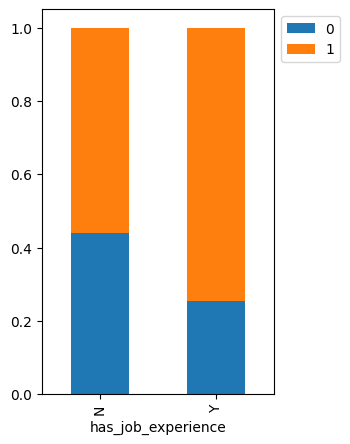

In [36]:
stacked_barplot(df, "has_job_experience", "case_status")

**Observation**
* Having job experience is found to have a positive effect on the visa certification likelihood.* 
More specifically, about 74% of the experienced applicants are granted visas, while this percentages is only 56% for the inexperienced applicants..

**Relation between requires_job_training and case_status**

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
N                      7513  15012  22525
Y                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


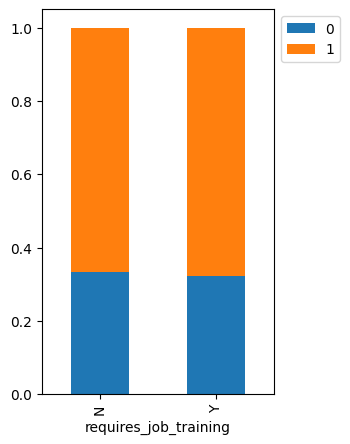

In [37]:
stacked_barplot(df, "requires_job_training", "case_status")

**Observation**
* The visa certification likelihood is found nearly unaffected by the job training requirement..

**Relation between region_of_employment and case_status**

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


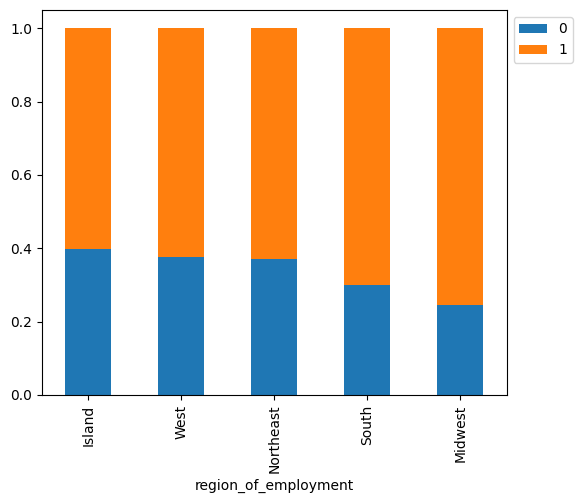

In [38]:
stacked_barplot(df, "region_of_employment", "case_status")

**Observation**
* It appears that the visa applications filed by the employers within the Midwest region have the highest probability (~76%) of certification.* 
The employers located in the Northeast, West, and Island regions have lower chances (60-63%) of visa certification.d.

**Relation between unit_of_wage and case_status**

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


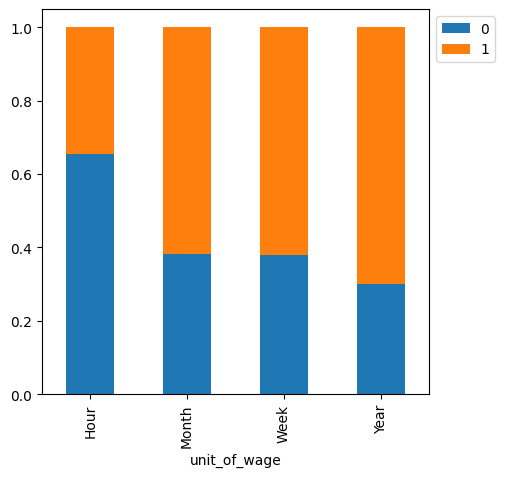

In [39]:
stacked_barplot(df, "unit_of_wage", "case_status")

**Observation**
* Those applicants whose wage unit is year are more likely than other applicants to be certified for a visa (~70% likelihood).* 
The applicants who are paid by hour are the least likely to be certified for a visa (~35% likelihood). This could be predicted, because hourly jobs are usually less important for the growth of the United States and they could be done by normal American workers.

**Relation between full_time_position and case_status**

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
Y                   7610  15163  22773
N                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


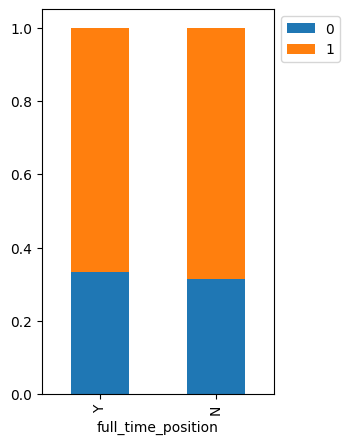

In [40]:
stacked_barplot(df, "full_time_position", "case_status")

**Observation**
* Visa certification seems to be unaffected by whether a position is full-time or part-time.

**Summary of EDA**

* The dataset has 25840 rows and 12 columns
* Only 3 variables are numerical rest all are object types.
* There are no missing data in the data set.

**Data Cleaning**

* Drop "case_id" as "case_id" is unique for each candidate and might not add value to modeling.

**Observations from EDA**

**Univariate Analysis**

* continent: Asia dominates with 66.2% of the data, followed by Europe (14.6%) and North America (12.9%).
* education_of_employee: The majority have a Bachelor's (40.2%) or Master’s degree (37.8%).
* prevailing_wage: Wages are highly varied, and further exploration through a histogram could reveal if there are any wage clusters.
* full_time_position: 89.4% of jobs are full-time, with the remaining 10.6% being part-time.

**Bivariate Analysis**

* Jobs requiring job training might prefer candidates with no prior experience.
* Larger companies might offer higher wages, although this could vary depending on the region or industry.
* Higher education levels might correlate with a higher proportion of certified cases.

**Multivariate Analysis**

* There is no strong correlation either with the target or between any independent variable.

## Data Preprocessing

In [41]:
data1 = df.copy()

**Missing Value Treatment**

Based on the initial evaluation, there were no missing values in any of the columns. However, certain rows contained unrealistic non-positive values (i.e., values less than or equal to 0) for the no_of_employees column. To address this issue, these non-positive values were replaced with the median value of no_of_employees.

For missing value imputation, we will perform the imputation process after splitting the data into train, test, and validation sets. This approach ensures that the model does not experience data leakage during training.

In [42]:
# Identify rows with non-positive no_of_employees
neg_employee_no_rows = data1.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
data1.loc[neg_employee_no_rows, "no_of_employees"] = data1.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {data1.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


### Feature Engineering

* The feature yr_of_estab is converted to yrs_snc_estab, containing the years since establishment. 
* The columns yr_of_estab and prevailing_wage are dropped subsequently.

In [43]:
# Add a new column, yrs_snc_estab, including years since establishment - final year is 2016, when data is gathered
data1["yrs_snc_estab"] = 2016 - data1.yr_of_estab

# Drom yr_of_estab
data1.drop("yr_of_estab", axis=1, inplace=True)

# Create a column including equivalent hourly wages - it is assumed that:
# A year includes 2080 work-hours
# A month includes 173 work-hours
# A week includes 40 work-hours
data1["hourly_wage"] = data1["prevailing_wage"]
data1.loc[data1.unit_of_wage == "Year", "hourly_wage"] = (
    data1.loc[data1.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
data1.loc[data1.unit_of_wage == "Month", "hourly_wage"] = (
    data1.loc[data1.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
data1.loc[data1.unit_of_wage == "Week", "hourly_wage"] = (
    data1.loc[data1.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

# Drom yr_of_estab
data1.drop("prevailing_wage", axis=1, inplace=True)

# Check sample rows of updated data
data1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,Bachelor's,Y,N,567,Midwest,Year,Y,1,24,12.905
23951,Oceania,Bachelor's,N,N,619,Midwest,Year,Y,1,78,31.933
8625,Asia,Master's,N,N,2635,South,Hour,Y,1,11,887.292
20206,Asia,Bachelor's,Y,Y,3184,Northeast,Year,Y,1,30,23.767
7471,Europe,Bachelor's,Y,N,4681,West,Year,Y,0,88,23.974
3433,Asia,Bachelor's,Y,N,222,South,Hour,Y,1,27,813.726
24440,Europe,High School,N,Y,3278,South,Year,Y,0,22,98.533
12104,Asia,Master's,Y,N,1359,West,Year,N,1,19,97.229
15656,Asia,Bachelor's,N,N,2081,West,Year,Y,0,13,53.708
23110,North America,Bachelor's,Y,N,854,Northeast,Hour,Y,0,18,444.826


In [44]:
# Check statistical summary of numeric data in updated data
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5669.798,22877.372,12.000,1028.000,2109.000,3504.000,602069.000
case_status,25480.000,0.668,0.471,0.000,0.000,1.000,1.000,1.000
yrs_snc_estab,25480.000,36.590,42.367,0.000,11.000,19.000,40.000,216.000
hourly_wage,25480.000,94.903,278.177,0.048,22.648,39.827,60.012,7004.399


**Observation**

* Outliers: There are extreme outliers in no_of_employees, yrs_snc_estab, and hourly_wage, which may warrant further investigation or treatment (e.g., capping or transformation).
* Case Status: Most cases (66.8%) have been certified, showing a higher success rate for applications.
* Employee Size and Wage Disparities: The dataset shows significant variation in the size of organizations and wages, with large organizations potentially skewing the average.

**Encoding Categorical Data**

* Encoding the values in the columns no_of_employees, yrs_snc_estab, continent, has_job_experience, requires_job_training, full_time_position, region_of_employment, case_status, unit_of_wage and education_of_employee

In [45]:
data1["no_of_employees"].describe()

count    25480.000
mean      5669.798
std      22877.372
min         12.000
25%       1028.000
50%       2109.000
75%       3504.000
max     602069.000
Name: no_of_employees, dtype: float64

In [46]:
# Discretize variable into equal-sized buckets based on quantiles
data1["total_no_of_employees"] = pd.qcut(
    df["no_of_employees"],
    q=[0, 0.25, 0.5, 1],
    labels=["0", "1", "2"],
)

In [47]:
data1["total_no_of_employees"].value_counts()

total_no_of_employees
2    12736
0     6376
1     6368
Name: count, dtype: int64

In [48]:
data1["yrs_snc_estab"].describe()

count   25480.000
mean       36.590
std        42.367
min         0.000
25%        11.000
50%        19.000
75%        40.000
max       216.000
Name: yrs_snc_estab, dtype: float64

In [49]:
# Discretize variable into equal-sized buckets based on quantiles
data1["years_of_established"] = pd.qcut(
    data1["yrs_snc_estab"],
    q=[0, 0.25, 0.5, 1],
    labels=["0", "1", "2"],
)

In [50]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
continent = {"Asia": 0, "Europe": 1, "North America": 2, "South America": 3, "Africa": 4, "Oceania": 5}
data1["continent"] = data1["continent"].map(continent)

education_of_employee = {"Bachelor's": 0, "Master's": 1, "High School": 2, "Doctorate": 3}
data1["education_of_employee"] = data1["education_of_employee"].map(education_of_employee)

has_job_experience = {"Y": 0,"N": 1,}
data1["has_job_experience"] = data1["has_job_experience"].map(has_job_experience)

requires_job_training = {"Y": 0,"N": 1,}
data1["requires_job_training"] = data1["requires_job_training"].map(requires_job_training)

region_of_employment = {
    "Northeast": 0,
    "South": 1,
    "West": 2,
    "Midwest": 3,
    "Island": 4,
}
data1["region_of_employment"] = data1["region_of_employment"].map(region_of_employment)

full_time_position = {"Y": 0,"N": 1,}
data1["full_time_position"] = data1["full_time_position"].map(full_time_position)

# Drom yr_of_estab
data1.drop("no_of_employees", axis=1, inplace=True)

In [51]:
data1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage,total_no_of_employees,years_of_established
0,0,2,1,1,2,Hour,0,0,9,592.203,2,0
1,0,1,0,1,0,Year,0,1,14,40.108,2,1
2,0,0,1,0,2,Year,0,0,8,59.133,2,0
3,0,0,1,1,2,Year,0,0,119,40.113,0,2
4,4,1,0,1,1,Year,0,1,11,72.071,1,0


**Observation**

* Values have been encoded.
* We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

**Detection and Treatment of Outliers**

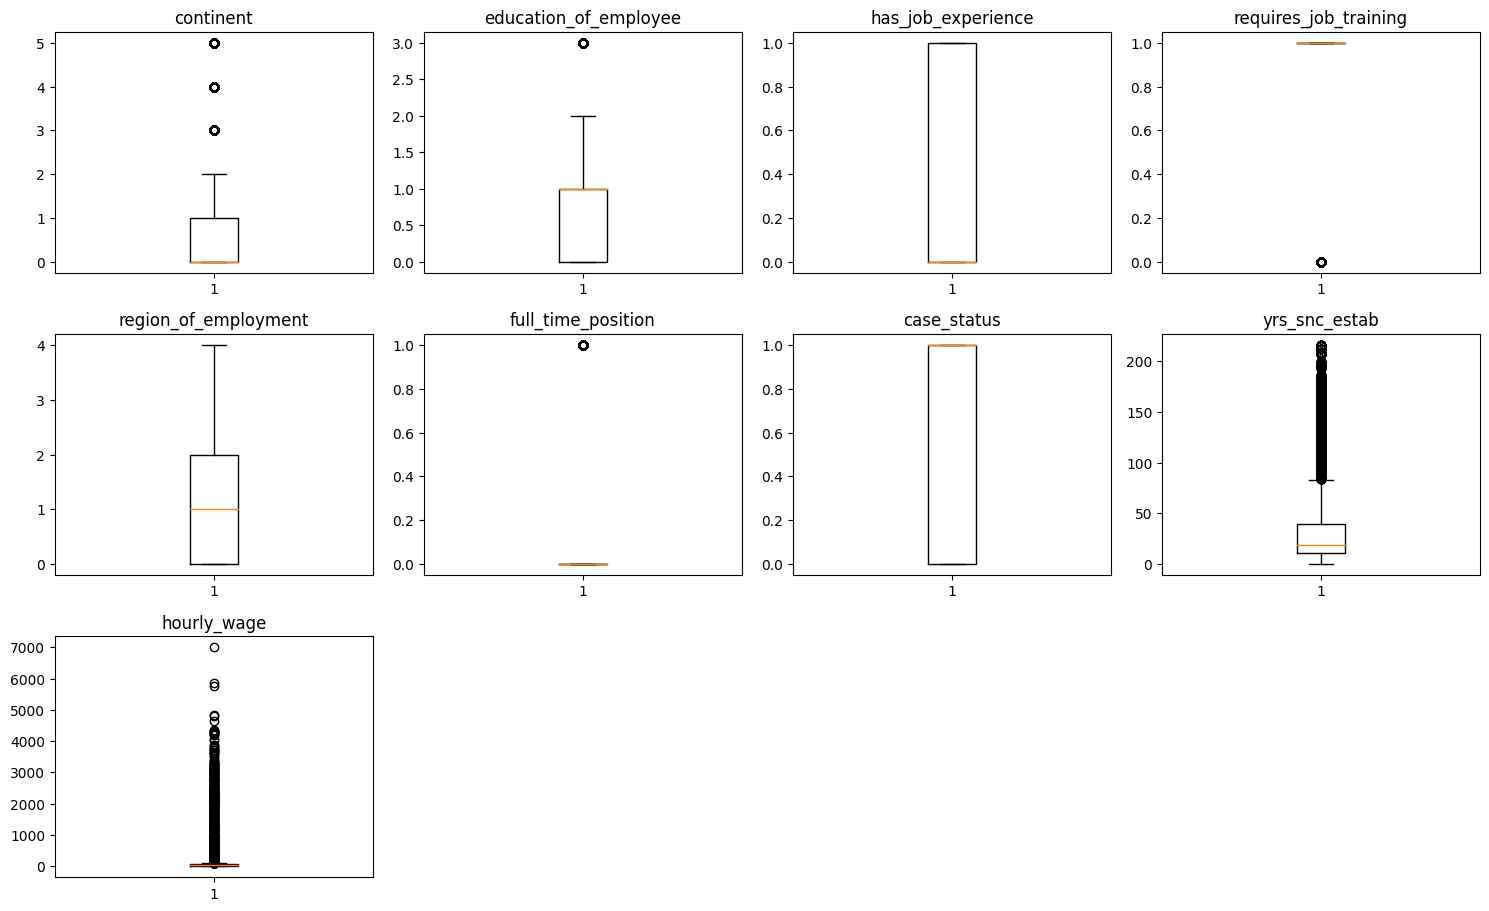

In [52]:
#Outlier detection using boxplot
numerical_cols = data1.select_dtypes(include=np.number).columns.tolist()

#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(data1[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**

* Outliers are there but as they are actual values, we will not treat them and leave them in the dataset.

### Data Preparation for Modeling

In [53]:
# Check the unique values in the case_status column
print(data1["case_status"].value_counts())

case_status
1    17018
0     8462
Name: count, dtype: int64


**Separation of independent and dependent variable**

In [54]:
X = data1.drop(["case_status"], axis=1)
y = data1["case_status"]

In [55]:
print(y.value_counts())

case_status
1    17018
0     8462
Name: count, dtype: int64


**Splitting data into training, validation and test set**

In [56]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 11) (5096, 11) (5096, 11)


In [57]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


### Missing Value Treatment

In [58]:
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [59]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [60]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
yrs_snc_estab            0
hourly_wage              0
total_no_of_employees    0
years_of_established     0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
yrs_snc_estab            0
hourly_wage              0
total_no_of_employees    0
years_of_established     0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
yrs_snc_estab            0
hourly_wage              0
total_no_of_employees    0
years_of_established     0
dtype: int64


* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [61]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [62]:
inverse_mapping(continent, "continent")
inverse_mapping(education_of_employee, "education_of_employee")
inverse_mapping(has_job_experience, "has_job_experience")
inverse_mapping(requires_job_training, "requires_job_training")
inverse_mapping(region_of_employment, "region_of_employment")
inverse_mapping(full_time_position, "full_time_position")

* Checking inverse mapped values/categories.

#### `Train Dataset`

In [63]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************
total_no_of_employees
2    7622
1    3838
0

#### `Validation Dataset`

In [64]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************
total_no_of_employees
2    2579
0    1282
1    1235
Name:

#### `Test Dataset`

In [65]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************
total_no_of_employees
2    2535
1    1295
0    1266
Name:

* Inverse mapping returned original labels.

### Creating Dummy Variables

In [66]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 24) (5096, 24) (5096, 24)


* After encoding there are 24 columns.

# Model Building

## Model evaluation criterion

**Model can make wrong predictions as:**
1. Predicting an applicant visa should be certified but in reality, the applicant visa is denied. 
2. Predicting an applicant visa should be denied but in reality, the applicant visa is certified. 

**Which case is more important?**
* Both are important:
If an applicant is approved when they would have been denied, an unqualified employee will get a job that should have been filled by a US citizen.
If an applicant is denied when they should have been approved, U.S. companies will not be able to fill critical positions and the overall economy will not be as productive.
**How to reduce this losses?
* As the process of reviewing each application is time and resource-intensive, this model should identify those candidates predicted to be approved, so agents can prioritize these applications.
* F1 Score can be used a the metric for evaluation of the model, as the greater the F1 score, the higher the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights, where applicable, so that model focuses equally on both classes.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data


Training Performance and Confusion Matrix:

Bagging (Training): Recall: 0.9860, Precision: 0.9913, F1 Score: 0.9887, Accuracy: 0.9849
Bagging (Validation): Recall: 0.7709, Precision: 0.7709, F1 Score: 0.7709, Accuracy: 0.6939


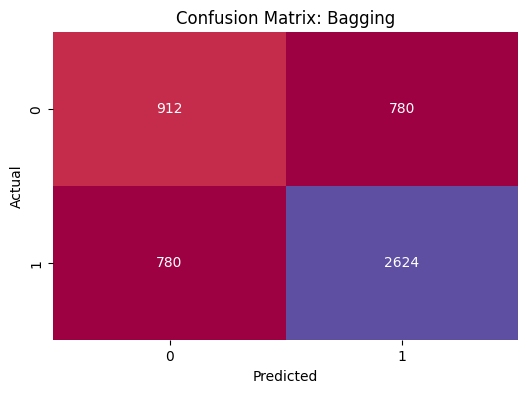

Random forest (Training): Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
Random forest (Validation): Recall: 0.8161, Precision: 0.7621, F1 Score: 0.7882, Accuracy: 0.7070


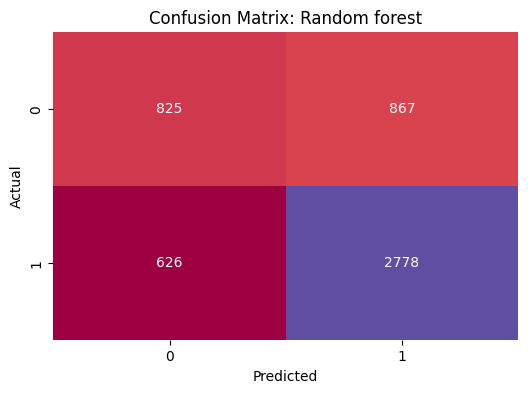

GBM (Training): Recall: 0.8784, Precision: 0.7837, F1 Score: 0.8283, Accuracy: 0.7569
GBM (Validation): Recall: 0.8699, Precision: 0.7817, F1 Score: 0.8234, Accuracy: 0.7508


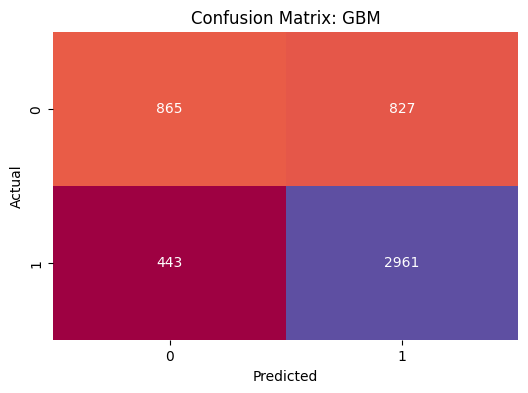

Adaboost (Training): Recall: 0.8883, Precision: 0.7601, F1 Score: 0.8192, Accuracy: 0.7382
Adaboost (Validation): Recall: 0.8772, Precision: 0.7598, F1 Score: 0.8143, Accuracy: 0.7327


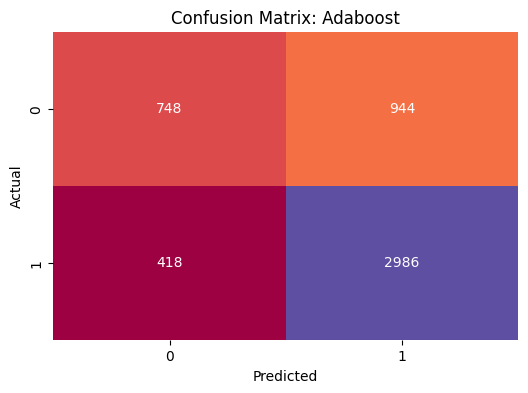

dtree (Training): Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
dtree (Validation): Recall: 0.7380, Precision: 0.7494, F1 Score: 0.7436, Accuracy: 0.6601


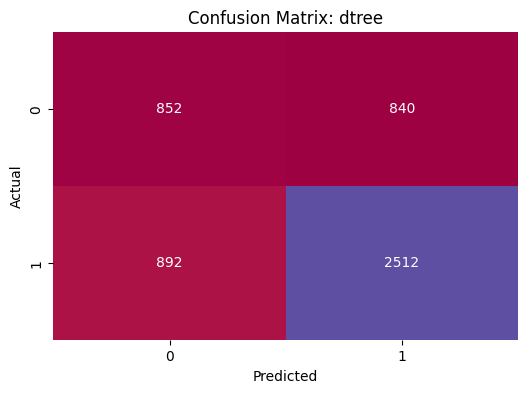

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Plot confusion matrix for validation
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Spectral", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

# Training performance and validation performance
print("\nTraining Performance and Confusion Matrix:\n")
for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics for Training
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    print(f"{name} (Training): Recall: {recall_train:.4f}, Precision: {precision_train:.4f}, F1 Score: {f1_train:.4f}, Accuracy: {accuracy_train:.4f}")
    print(f"{name} (Validation): Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, F1 Score: {f1_val:.4f}, Accuracy: {accuracy_val:.4f}")

    # Plot Confusion Matrix for Validation
    plot_confusion_matrix(y_val, y_val_pred, name)

**Observation**

Overfitting Issues: The Random Forest and Decision Tree models show signs of overfitting, as evidenced by their perfect training metrics contrasted with much lower validation metrics. This suggests they have learned the training data too well, including noise and outliers.

Generalization: Both GBM and AdaBoost exhibit more consistent performance between training and validation metrics, indicating better generalization to unseen data.

Best Model: While Random Forest had the highest recall on the validation set, GBM and AdaBoost may be more reliable for practical applications due to their balanced performance and lower risk of overfitting.


Training and Validation Performance Difference:

Bagging:
  Recall      -> Training: 0.9860, Validation: 0.7709, Difference: 0.2151
  Precision   -> Training: 0.9913, Validation: 0.7709, Difference: 0.2205
  F1 Score    -> Training: 0.9887, Validation: 0.7709, Difference: 0.2178
  Accuracy    -> Training: 0.9849, Validation: 0.6939, Difference: 0.2910



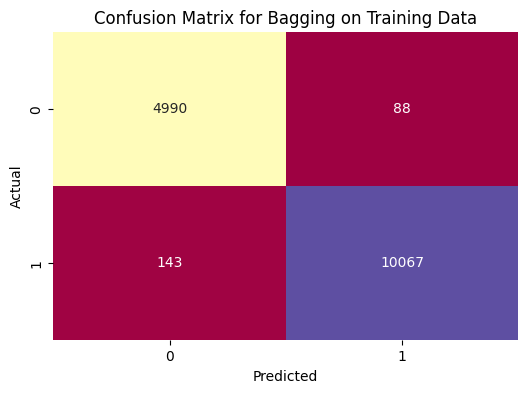

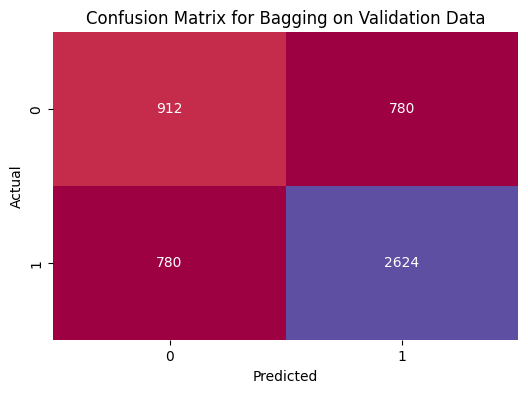

Random forest:
  Recall      -> Training: 1.0000, Validation: 0.8161, Difference: 0.1839
  Precision   -> Training: 1.0000, Validation: 0.7621, Difference: 0.2379
  F1 Score    -> Training: 1.0000, Validation: 0.7882, Difference: 0.2118
  Accuracy    -> Training: 1.0000, Validation: 0.7070, Difference: 0.2930



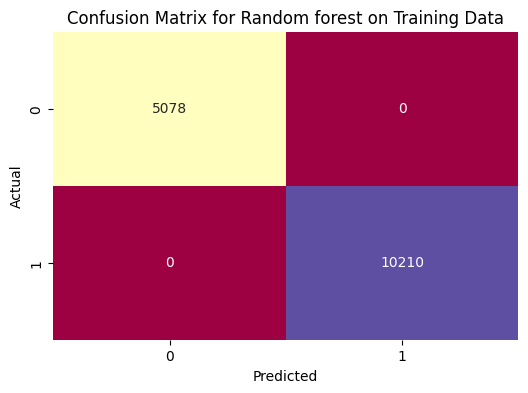

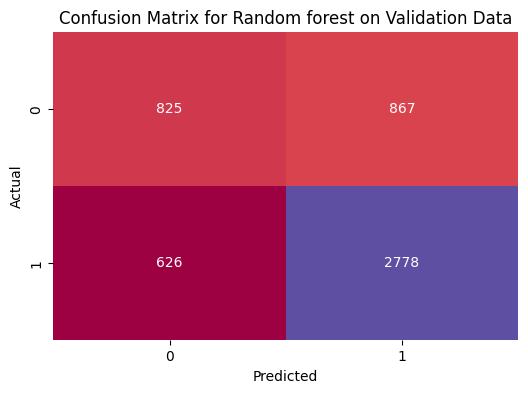

GBM:
  Recall      -> Training: 0.8784, Validation: 0.8699, Difference: 0.0085
  Precision   -> Training: 0.7837, Validation: 0.7817, Difference: 0.0020
  F1 Score    -> Training: 0.8283, Validation: 0.8234, Difference: 0.0049
  Accuracy    -> Training: 0.7569, Validation: 0.7508, Difference: 0.0061



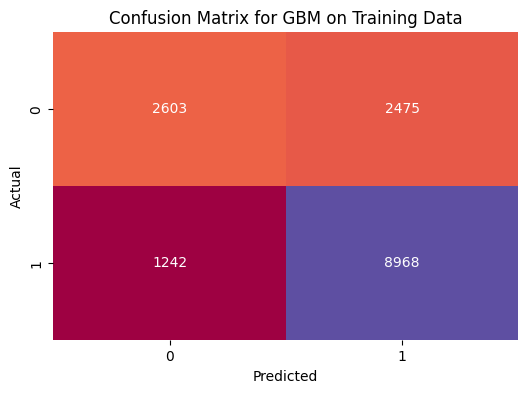

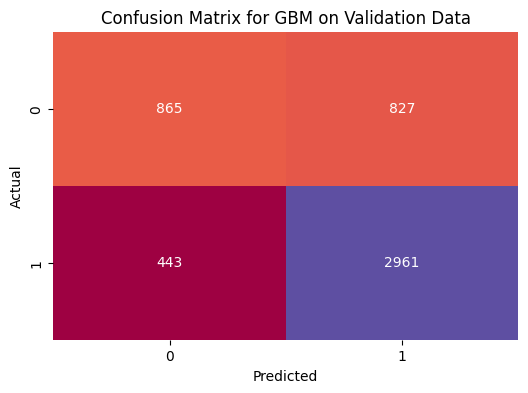

Adaboost:
  Recall      -> Training: 0.8883, Validation: 0.8772, Difference: 0.0111
  Precision   -> Training: 0.7601, Validation: 0.7598, Difference: 0.0003
  F1 Score    -> Training: 0.8192, Validation: 0.8143, Difference: 0.0049
  Accuracy    -> Training: 0.7382, Validation: 0.7327, Difference: 0.0054



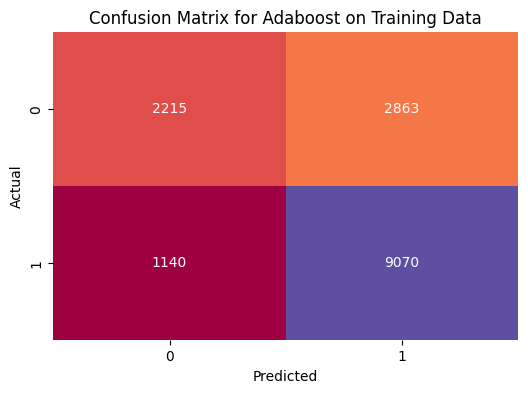

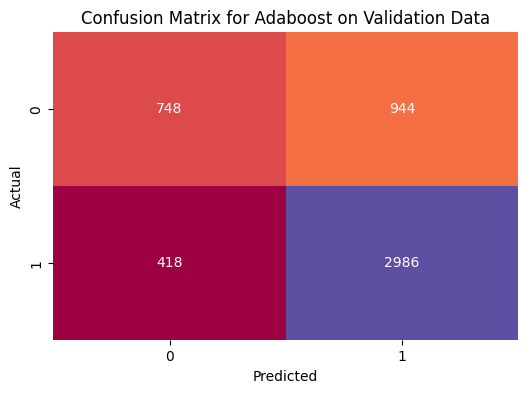

dtree:
  Recall      -> Training: 1.0000, Validation: 0.7380, Difference: 0.2620
  Precision   -> Training: 1.0000, Validation: 0.7494, Difference: 0.2506
  F1 Score    -> Training: 1.0000, Validation: 0.7436, Difference: 0.2564
  Accuracy    -> Training: 1.0000, Validation: 0.6601, Difference: 0.3399



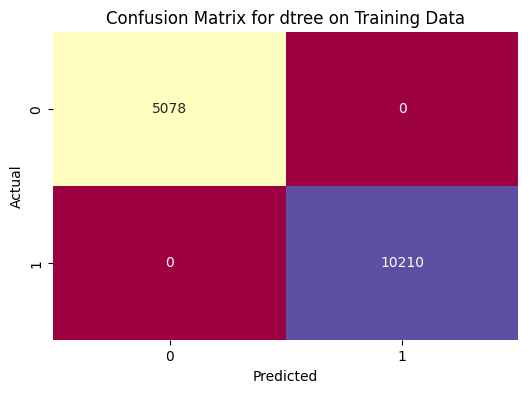

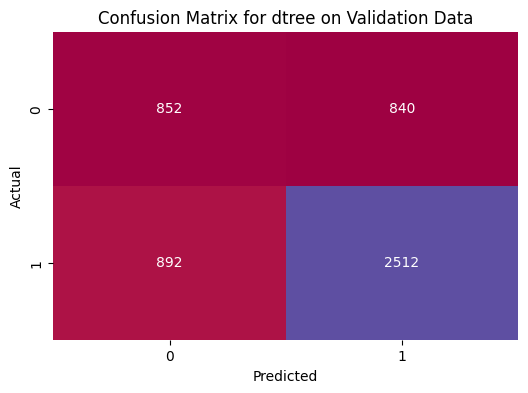

In [70]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, dataset_type):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral", cbar=False)
    plt.title(f'Confusion Matrix for {model_name} on {dataset_type} Data')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("\nTraining and Validation Performance Difference:\n")

# Loop over each model
for name, model in models:
    # Fit model on training data
    model.fit(X_train, y_train)
    
    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Metrics for Training
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    # Differences between Training and Validation metrics
    recall_diff = recall_train - recall_val
    precision_diff = precision_train - precision_val
    f1_diff = f1_train - f1_val
    accuracy_diff = accuracy_train - accuracy_val
    
    # Print the differences
    print(f"{name}:")
    print(f"  Recall      -> Training: {recall_train:.4f}, Validation: {recall_val:.4f}, Difference: {recall_diff:.4f}")
    print(f"  Precision   -> Training: {precision_train:.4f}, Validation: {precision_val:.4f}, Difference: {precision_diff:.4f}")
    print(f"  F1 Score    -> Training: {f1_train:.4f}, Validation: {f1_val:.4f}, Difference: {f1_diff:.4f}")
    print(f"  Accuracy    -> Training: {accuracy_train:.4f}, Validation: {accuracy_val:.4f}, Difference: {accuracy_diff:.4f}\n")
    
    # Confusion Matrix for Training set
    cm_train = confusion_matrix(y_train, y_train_pred)
    plot_confusion_matrix(cm_train, name, "Training")
    
    # Confusion Matrix for Validation set
    cm_val = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm_val, name, "Validation")

**Observation**

Generalization Capability: GBM and AdaBoost show strong generalization capabilities with minimal differences in performance metrics between training and validation sets. This suggests they may be better suited for practical applications where the model needs to perform well on new data.

Overfitting Risks: Bagging, Random Forest, and Decision Tree demonstrate considerable overfitting, with substantial performance declines on validation datasets. This highlights the need for strategies to reduce overfitting, such as hyperparameter tuning, cross-validation, or employing regularization techniques.

Model Selection: When choosing a model for deployment, GBM and AdaBoost appear to be the most reliable options due to their consistent performance across training and validation datasets. In contrast, Bagging, Random Forest, and Decision Tree may require further adjustments to improve their generalization abilities before practical use.

### Model Building - Oversampled Data

In [71]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 24)
After Oversampling, the shape of train_y: (20420,) 




Training and Validation Performance:

Bagging:
  Training - Recall: 0.9805, Precision: 0.9925, F1: 0.9865, Accuracy: 0.9865
  Validation - Recall: 0.7335, Precision: 0.7755, F1: 0.7539, Accuracy: 0.6801


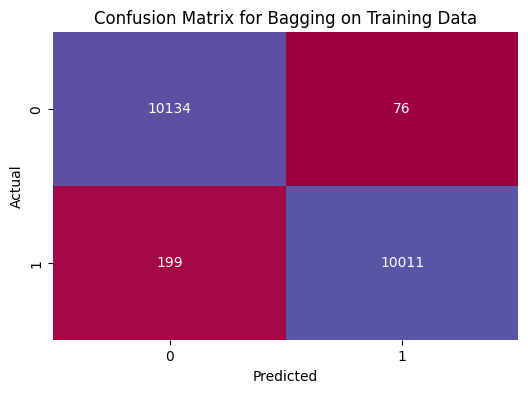

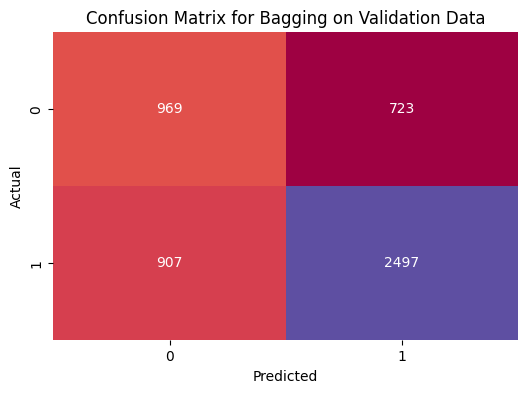


Random forest:
  Training - Recall: 0.9999, Precision: 1.0000, F1: 1.0000, Accuracy: 1.0000
  Validation - Recall: 0.7844, Precision: 0.7697, F1: 0.7770, Accuracy: 0.6992


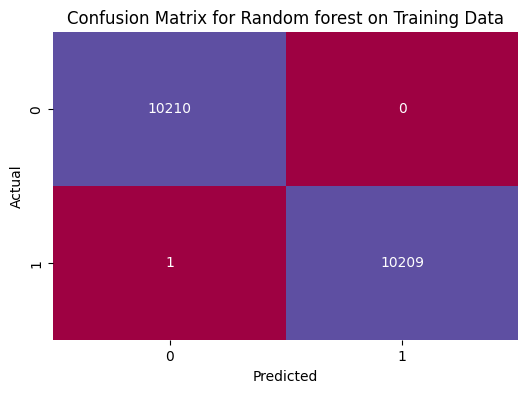

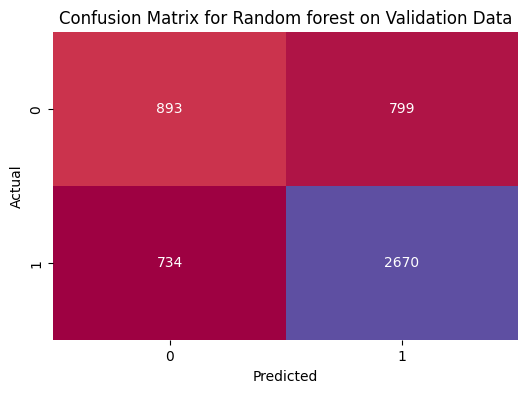


GBM:
  Training - Recall: 0.8405, Precision: 0.7583, F1: 0.7973, Accuracy: 0.7863
  Validation - Recall: 0.8352, Precision: 0.7935, F1: 0.8138, Accuracy: 0.7447


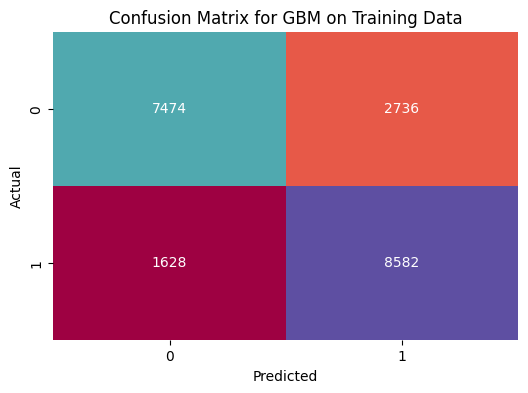

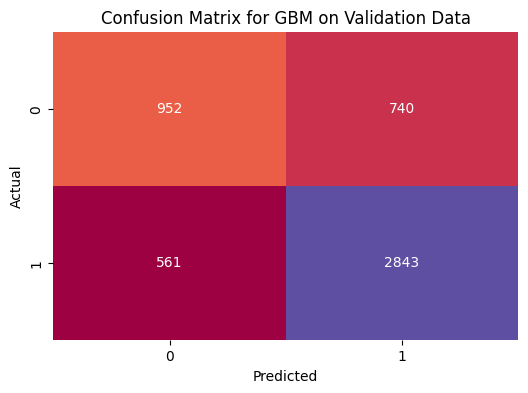


Adaboost:
  Training - Recall: 0.8391, Precision: 0.7406, F1: 0.7868, Accuracy: 0.7726
  Validation - Recall: 0.8381, Precision: 0.7827, F1: 0.8095, Accuracy: 0.7365


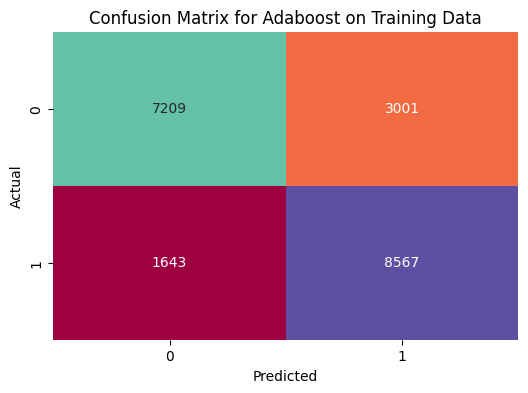

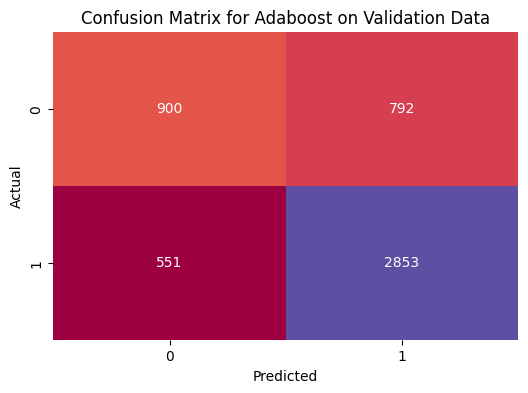


dtree:
  Training - Recall: 1.0000, Precision: 1.0000, F1: 1.0000, Accuracy: 1.0000
  Validation - Recall: 0.7083, Precision: 0.7407, F1: 0.7241, Accuracy: 0.6395


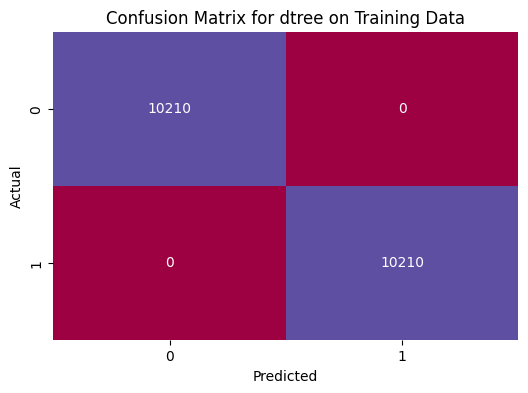

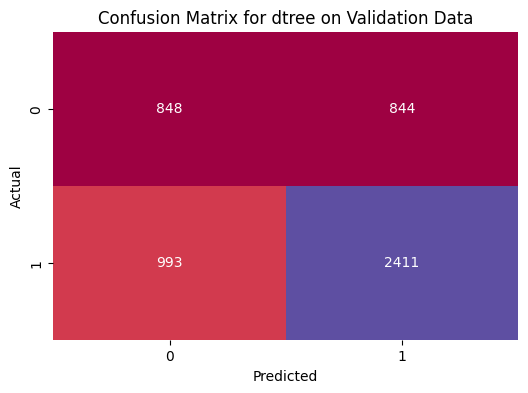

In [72]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, dataset_type):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral", cbar=False)
    plt.title(f'Confusion Matrix for {model_name} on {dataset_type} Data')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Empty list to store the models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Training and evaluating the models
print("\nTraining and Validation Performance:")

for name, model in models:
    # Fit the model on oversampled training data
    model.fit(X_train_over, y_train_over)

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train_over)
    y_val_pred = model.predict(X_val)

    # Metrics for training set
    recall_train = recall_score(y_train_over, y_train_pred)
    precision_train = precision_score(y_train_over, y_train_pred)
    f1_train = f1_score(y_train_over, y_train_pred)
    accuracy_train = accuracy_score(y_train_over, y_train_pred)

    # Metrics for validation set
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Print metrics
    print(f"\n{name}:")
    print(f"  Training - Recall: {recall_train:.4f}, Precision: {precision_train:.4f}, F1: {f1_train:.4f}, Accuracy: {accuracy_train:.4f}")
    print(f"  Validation - Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, F1: {f1_val:.4f}, Accuracy: {accuracy_val:.4f}")
    
    # Confusion Matrix for Training set
    cm_train = confusion_matrix(y_train_over, y_train_pred)
    plot_confusion_matrix(cm_train, name, "Training")

    # Confusion Matrix for Validation set
    cm_val = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm_val, name, "Validation")

**Observation**

Overfitting Concerns: Bagging, Random Forest, and Decision Tree models exhibit substantial overfitting, as seen by their high training scores compared to significantly lower validation scores.

Generalization Strength: GBM and AdaBoost appear more robust, with minimal performance differences, suggesting that they can effectively generalize to unseen data.

Model Selection: GBM and AdaBoost should be preferred for practical applications where generalization is critical. In contrast, models like Bagging, Random Forest, and Decision Tree may require further adjustments (e.g., tuning hyperparameters) to improve generalization capabilities.


Training and Validation Performance Difference:

Bagging:
  Recall      -> Training: 0.9805, Validation: 0.7335, Difference: 0.2470
  Precision   -> Training: 0.9925, Validation: 0.7755, Difference: 0.2170
  F1 Score    -> Training: 0.9865, Validation: 0.7539, Difference: 0.2325
  Accuracy    -> Training: 0.9865, Validation: 0.6801, Difference: 0.3064



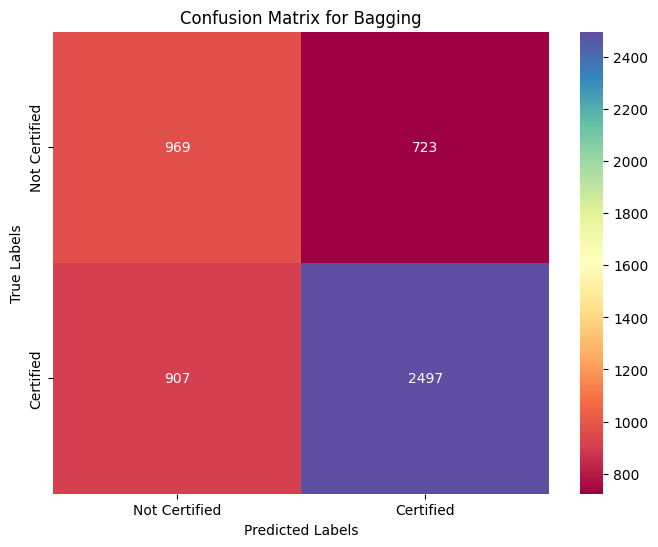

Random forest:
  Recall      -> Training: 0.9999, Validation: 0.7844, Difference: 0.2155
  Precision   -> Training: 1.0000, Validation: 0.7697, Difference: 0.2303
  F1 Score    -> Training: 1.0000, Validation: 0.7770, Difference: 0.2230
  Accuracy    -> Training: 1.0000, Validation: 0.6992, Difference: 0.3008



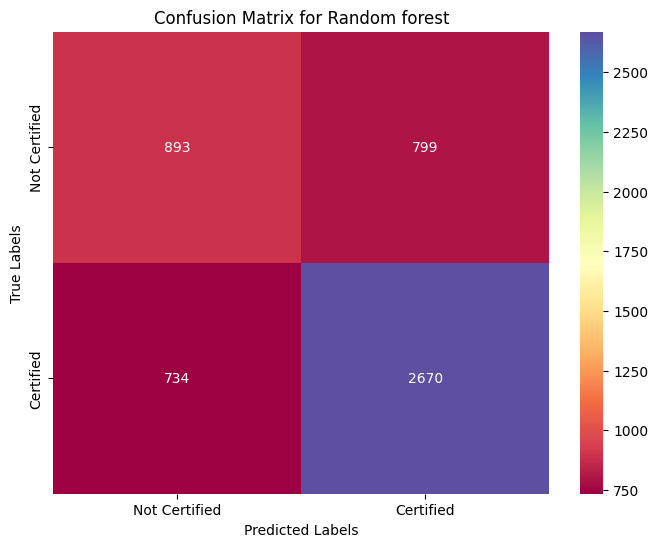

GBM:
  Recall      -> Training: 0.8405, Validation: 0.8352, Difference: 0.0054
  Precision   -> Training: 0.7583, Validation: 0.7935, Difference: -0.0352
  F1 Score    -> Training: 0.7973, Validation: 0.8138, Difference: -0.0165
  Accuracy    -> Training: 0.7863, Validation: 0.7447, Difference: 0.0416



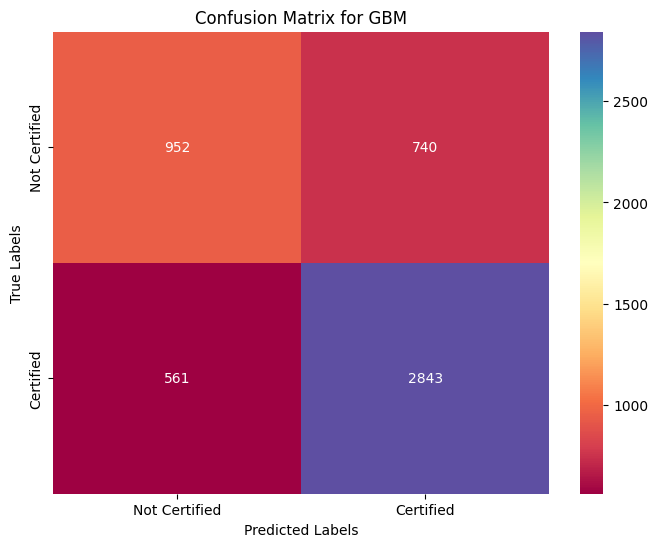

Adaboost:
  Recall      -> Training: 0.8391, Validation: 0.8381, Difference: 0.0009
  Precision   -> Training: 0.7406, Validation: 0.7827, Difference: -0.0421
  F1 Score    -> Training: 0.7868, Validation: 0.8095, Difference: -0.0227
  Accuracy    -> Training: 0.7726, Validation: 0.7365, Difference: 0.0361



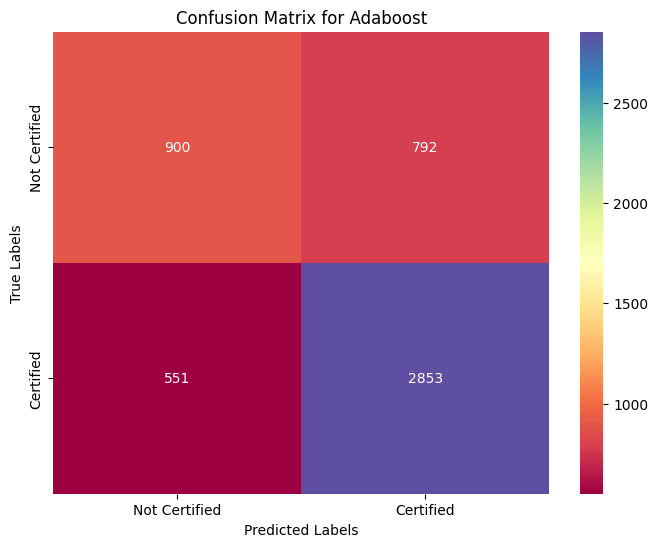

dtree:
  Recall      -> Training: 1.0000, Validation: 0.7083, Difference: 0.2917
  Precision   -> Training: 1.0000, Validation: 0.7407, Difference: 0.2593
  F1 Score    -> Training: 1.0000, Validation: 0.7241, Difference: 0.2759
  Accuracy    -> Training: 1.0000, Validation: 0.6395, Difference: 0.3605



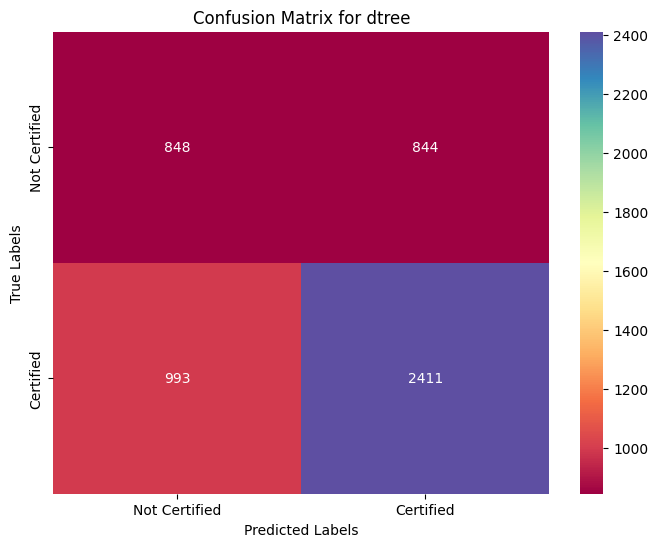

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

print("\nTraining and Validation Performance Difference:\n")

# Loop over each model
for name, model in models:
    # Fit the model on oversampled training data
    model.fit(X_train_over, y_train_over)
    
    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train_over)
    y_val_pred = model.predict(X_val)
    
    # Metrics for Training
    recall_train = recall_score(y_train_over, y_train_pred)
    precision_train = precision_score(y_train_over, y_train_pred)
    f1_train = f1_score(y_train_over, y_train_pred)
    accuracy_train = accuracy_score(y_train_over, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    # Differences between Training and Validation metrics
    recall_diff = recall_train - recall_val
    precision_diff = precision_train - precision_val
    f1_diff = f1_train - f1_val
    accuracy_diff = accuracy_train - accuracy_val
    
    # Print the differences
    print(f"{name}:")
    print(f"  Recall      -> Training: {recall_train:.4f}, Validation: {recall_val:.4f}, Difference: {recall_diff:.4f}")
    print(f"  Precision   -> Training: {precision_train:.4f}, Validation: {precision_val:.4f}, Difference: {precision_diff:.4f}")
    print(f"  F1 Score    -> Training: {f1_train:.4f}, Validation: {f1_val:.4f}, Difference: {f1_diff:.4f}")
    print(f"  Accuracy    -> Training: {accuracy_train:.4f}, Validation: {accuracy_val:.4f}, Difference: {accuracy_diff:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Spectral", xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

**Observation**

Severe Overfitting: Bagging, Random Forest, and Decision Tree models demonstrate significant overfitting, as indicated by their substantial performance declines in validation metrics.

Robust Generalization: GBM and AdaBoost show strong performance consistency across training and validation datasets, indicating they can generalize better to unseen data.

Model Selection: For practical applications, GBM and AdaBoost should be prioritized due to their balanced performance, while Bagging, Random Forest, and Decision Tree may need tuning to enhance generalization.

### Model Building - Undersampled Data

In [74]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [75]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 24)
After Under Sampling, the shape of train_y: (10156,) 




Training Performance:

Bagging:
  Recall: 0.9677, Precision: 0.9933, F1 Score: 0.9803, Accuracy: 0.9806
Random forest:
  Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
GBM:
  Recall: 0.7475, Precision: 0.7093, F1 Score: 0.7279, Accuracy: 0.7206
Adaboost:
  Recall: 0.7127, Precision: 0.6921, F1 Score: 0.7022, Accuracy: 0.6978
dtree:
  Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000

Validation Performance:

Bagging:
  Recall: 0.6063, Precision: 0.8174, F1 Score: 0.6962, Accuracy: 0.6466


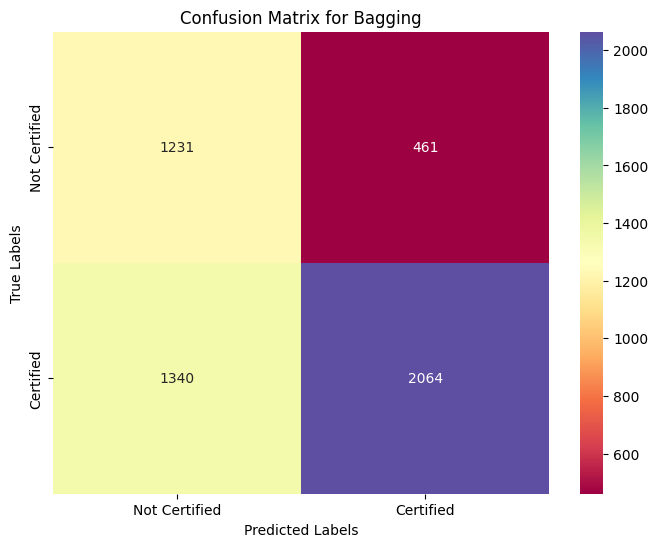

Random forest:
  Recall: 0.6545, Precision: 0.8090, F1 Score: 0.7236, Accuracy: 0.6660


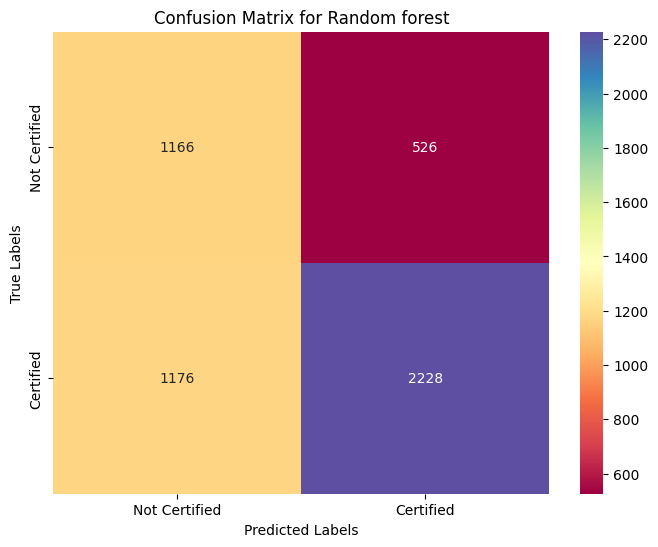

GBM:
  Recall: 0.7312, Precision: 0.8291, F1 Score: 0.7771, Accuracy: 0.7198


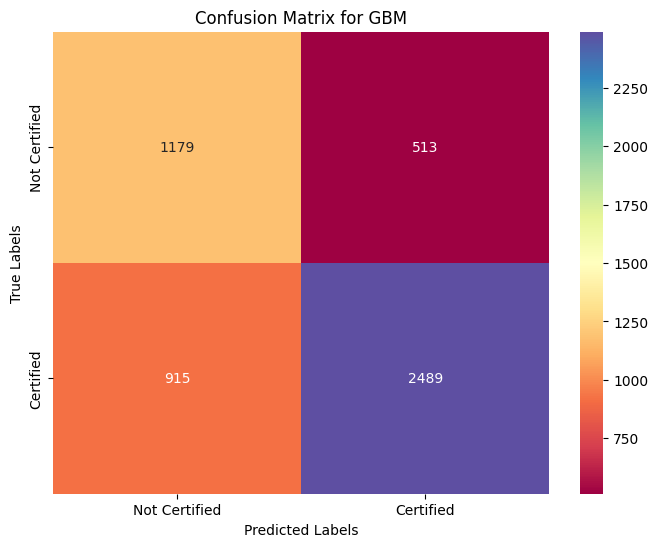

Adaboost:
  Recall: 0.7086, Precision: 0.8238, F1 Score: 0.7618, Accuracy: 0.7041


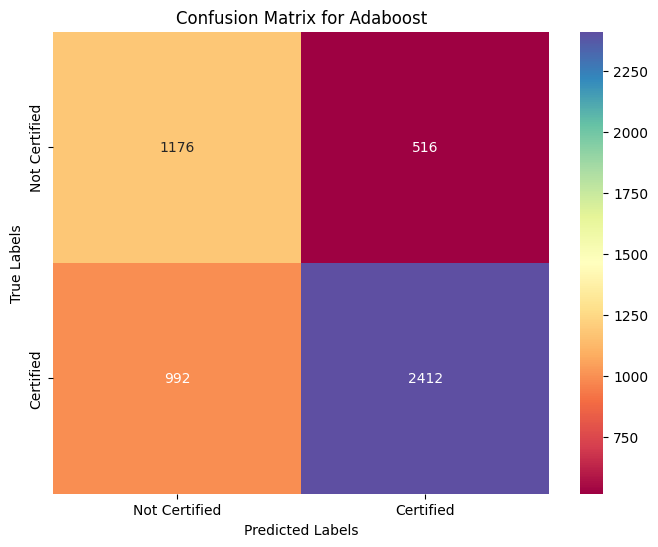

dtree:
  Recall: 0.6316, Precision: 0.7720, F1 Score: 0.6948, Accuracy: 0.6293


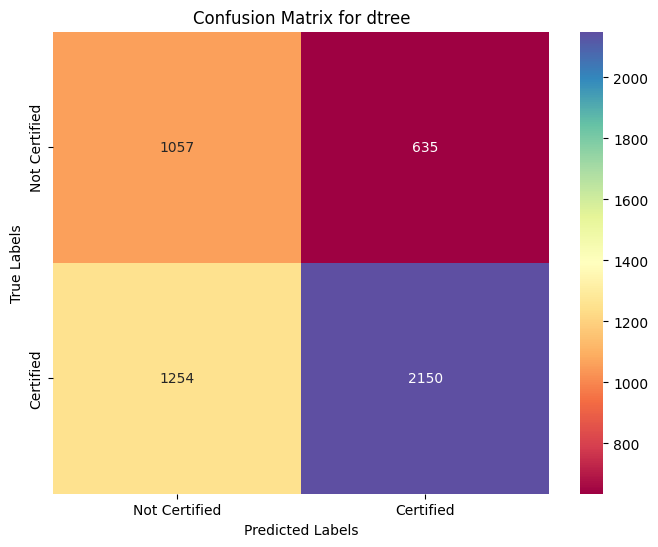

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Training Performance
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    
    # Training Predictions
    y_train_pred = model.predict(X_train_un)
    
    # Calculate metrics
    recall_train = recall_score(y_train_un, y_train_pred)
    precision_train = precision_score(y_train_un, y_train_pred)
    f1_train = f1_score(y_train_un, y_train_pred)
    accuracy_train = accuracy_score(y_train_un, y_train_pred)

    print(f"{name}:")
    print(f"  Recall: {recall_train:.4f}, Precision: {precision_train:.4f}, F1 Score: {f1_train:.4f}, Accuracy: {accuracy_train:.4f}")

# Validation Performance
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)

    # Validation Predictions
    y_val_pred = model.predict(X_val)

    # Calculate metrics
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    print(f"{name}:")
    print(f"  Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, F1 Score: {f1_val:.4f}, Accuracy: {accuracy_val:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Spectral", xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

**Observation**

Overfitting: Random Forest and Decision Tree are likely overfitting, given their perfect training metrics. Although they perform reasonably well on validation data, there is a notable difference in their recall and precision.

Balanced Generalization: GBM and Adaboost demonstrate relatively good performance on both training and validation datasets, suggesting that they can generalize better while maintaining performance across metrics.

Model Selection: For practical applications, selecting GBM or Adaboost may be beneficial due to their balanced performance, whereas Random Forest and Decision Tree might require further tuning to enhance generalization.


Training and Validation Performance Difference:

Bagging:
  Recall      -> Training: 0.9677, Validation: 0.6063, Difference: 0.3614
  Precision   -> Training: 0.9933, Validation: 0.8174, Difference: 0.1759
  F1 Score    -> Training: 0.9803, Validation: 0.6962, Difference: 0.2841
  Accuracy    -> Training: 0.9806, Validation: 0.6466, Difference: 0.3340



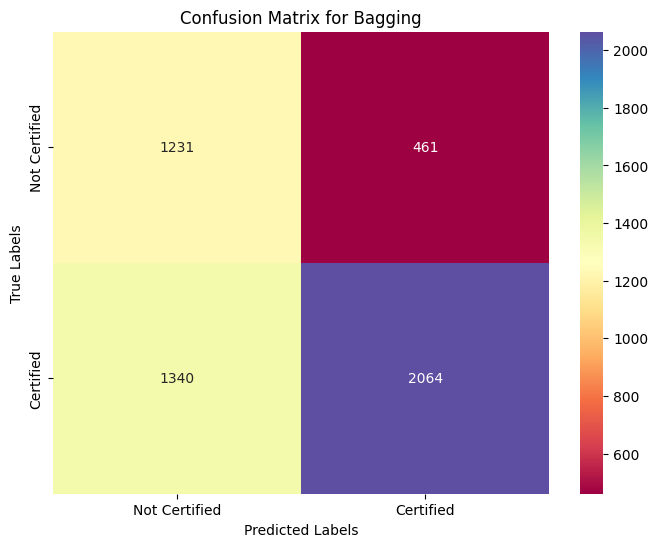

Random forest:
  Recall      -> Training: 1.0000, Validation: 0.6545, Difference: 0.3455
  Precision   -> Training: 1.0000, Validation: 0.8090, Difference: 0.1910
  F1 Score    -> Training: 1.0000, Validation: 0.7236, Difference: 0.2764
  Accuracy    -> Training: 1.0000, Validation: 0.6660, Difference: 0.3340



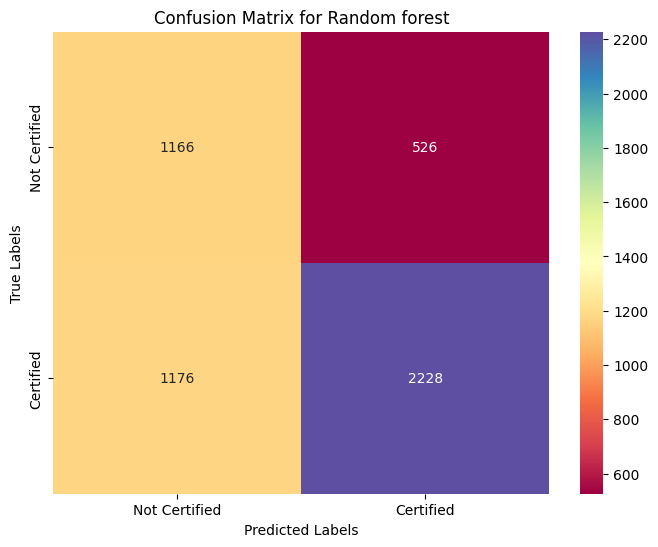

GBM:
  Recall      -> Training: 0.7475, Validation: 0.7312, Difference: 0.0163
  Precision   -> Training: 0.7093, Validation: 0.8291, Difference: -0.1198
  F1 Score    -> Training: 0.7279, Validation: 0.7771, Difference: -0.0492
  Accuracy    -> Training: 0.7206, Validation: 0.7198, Difference: 0.0008



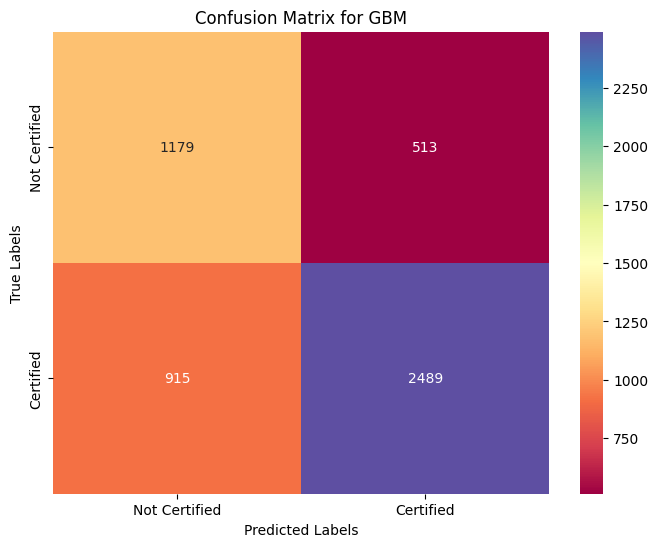

Adaboost:
  Recall      -> Training: 0.7127, Validation: 0.7086, Difference: 0.0041
  Precision   -> Training: 0.6921, Validation: 0.8238, Difference: -0.1317
  F1 Score    -> Training: 0.7022, Validation: 0.7618, Difference: -0.0596
  Accuracy    -> Training: 0.6978, Validation: 0.7041, Difference: -0.0063



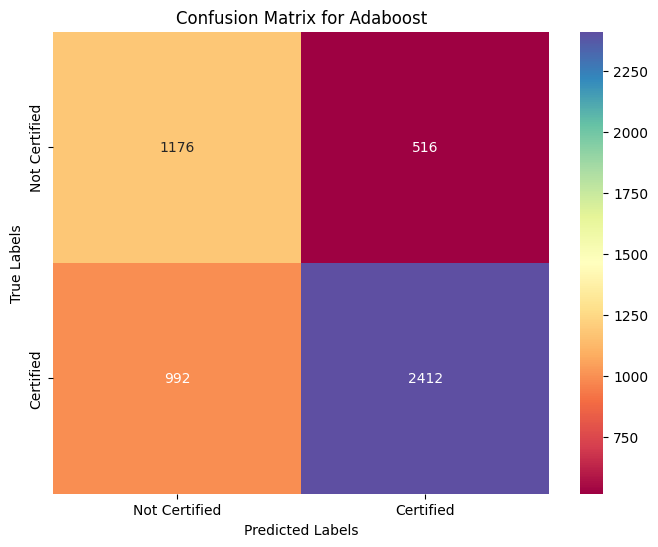

dtree:
  Recall      -> Training: 1.0000, Validation: 0.6316, Difference: 0.3684
  Precision   -> Training: 1.0000, Validation: 0.7720, Difference: 0.2280
  F1 Score    -> Training: 1.0000, Validation: 0.6948, Difference: 0.3052
  Accuracy    -> Training: 1.0000, Validation: 0.6293, Difference: 0.3707



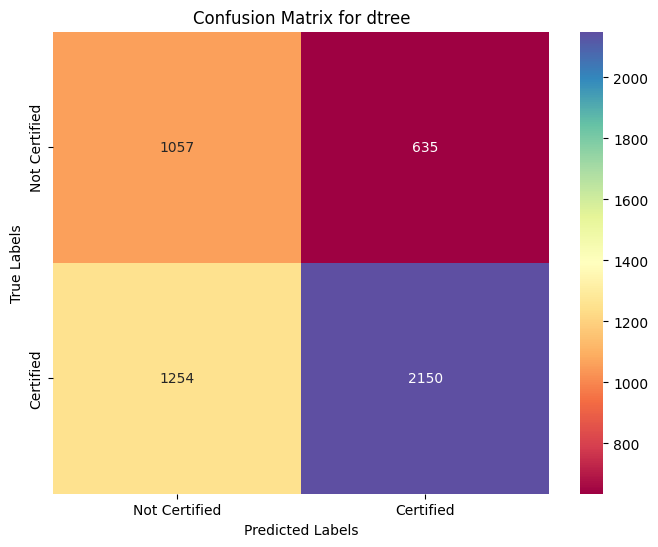

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

print("\nTraining and Validation Performance Difference:\n")

# Loop over each model
for name, model in models:
    # Fit the model on the unbalanced training data
    model.fit(X_train_un, y_train_un)
    
    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train_un)
    y_val_pred = model.predict(X_val)
    
    # Metrics for Training
    recall_train = recall_score(y_train_un, y_train_pred)
    precision_train = precision_score(y_train_un, y_train_pred)
    f1_train = f1_score(y_train_un, y_train_pred)
    accuracy_train = accuracy_score(y_train_un, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    # Differences between Training and Validation metrics
    recall_diff = recall_train - recall_val
    precision_diff = precision_train - precision_val
    f1_diff = f1_train - f1_val
    accuracy_diff = accuracy_train - accuracy_val
    
    # Print the differences
    print(f"{name}:")
    print(f"  Recall      -> Training: {recall_train:.4f}, Validation: {recall_val:.4f}, Difference: {recall_diff:.4f}")
    print(f"  Precision   -> Training: {precision_train:.4f}, Validation: {precision_val:.4f}, Difference: {precision_diff:.4f}")
    print(f"  F1 Score    -> Training: {f1_train:.4f}, Validation: {f1_val:.4f}, Difference: {f1_diff:.4f}")
    print(f"  Accuracy    -> Training: {accuracy_train:.4f}, Validation: {accuracy_val:.4f}, Difference: {accuracy_diff:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Spectral", xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

**Observation**

Overfitting: Both Bagging, Random Forest, and Decision Tree models exhibit signs of overfitting, as evidenced by their high training scores and significantly lower validation metrics. These models may require tuning to reduce complexity and improve generalization.

Good Generalization: GBM and Adaboost demonstrate better balance in performance across training and validation datasets, suggesting that they are more robust and suitable for practical applications.

Model Selection Strategy: Given the findings, prioritizing models like GBM or Adaboost for deployment may yield better outcomes, while further refining Random Forest and Decision Tree is advisable to enhance their generalization capabilities.

- GBM has the best performance followed by AdaBoost model as per the validation performance

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [78]:
%%time

# Define the model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create multiple scorers for evaluation
scoring = {
    'recall': metrics.make_scorer(metrics.recall_score),
    'precision': metrics.make_scorer(metrics.precision_score),
    'f1': metrics.make_scorer(metrics.f1_score),
    'accuracy': metrics.make_scorer(metrics.accuracy_score)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                    n_jobs=-1, n_iter=50, scoring=scoring, 
                                    cv=5, refit='f1', random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Getting the best parameters and scores for all metrics
print("Best parameters are {} with CV f1 score={:.4f}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get the best score for each metric
for metric in scoring.keys():
    print(f"Best {metric} score: {randomized_cv.cv_results_[f'mean_test_{metric}'][randomized_cv.best_index_]:.4f}")

Best parameters are {'n_estimators': 20, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV f1 score=0.7154
Best recall score: 0.7434
Best precision score: 0.6897
Best f1 score: 0.7154
Best accuracy score: 0.7043
CPU times: total: 1.62 s
Wall time: 15.3 s


In [79]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [80]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.702,0.717,0.697,0.707


In [81]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.709,0.714,0.828,0.766


### Tuning  Gradient Boosting model with Undersampled Data

In [82]:
%%time

# Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125, 175, 25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.5, 0.7, 1],
}

# Create multiple scorers for evaluation
scoring = {
    'recall': metrics.make_scorer(metrics.recall_score),
    'precision': metrics.make_scorer(metrics.precision_score),
    'f1': metrics.make_scorer(metrics.f1_score),
    'accuracy': metrics.make_scorer(metrics.accuracy_score)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                    n_iter=50, scoring=scoring, 
                                    cv=5, refit='f1', random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Getting the best parameters and scores for all metrics
print("Best parameters are {} with CV f1 score={:.4f}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get the best score for each metric
for metric in scoring.keys():
    print(f"Best {metric} score: {randomized_cv.cv_results_[f'mean_test_{metric}'][randomized_cv.best_index_]:.4f}")

Best parameters are {'subsample': 0.8, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV f1 score=0.7140
Best recall score: 0.7359
Best precision score: 0.6935
Best f1 score: 0.7140
Best accuracy score: 0.7053
CPU times: total: 2.53 s
Wall time: 40.2 s


In [83]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [84]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.703,0.713,0.699,0.706


In [85]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.707,0.707,0.829,0.764


### Tuning Gradient Boosting model with Oversampled data

In [86]:
%%time

# Defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Create multiple scorers for evaluation
scoring = {
    'recall': metrics.make_scorer(metrics.recall_score),
    'precision': metrics.make_scorer(metrics.precision_score),
    'f1': metrics.make_scorer(metrics.f1_score),
    'accuracy': metrics.make_scorer(metrics.accuracy_score)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                    param_distributions=param_grid,
                                    n_iter=50, 
                                    scoring=scoring, 
                                    cv=5, 
                                    refit='f1',  # Refit the best model based on f1
                                    random_state=1, 
                                    n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Getting the best parameters and scores for all metrics
print("Best parameters are {} with CV f1 score={:.4f}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get the best score for each metric
for metric in scoring.keys():
    print(f"Best {metric} score: {randomized_cv.cv_results_[f'mean_test_{metric}'][randomized_cv.best_index_]:.4f}")

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV f1 score=0.7935
Best recall score: 0.8437
Best precision score: 0.7623
Best f1 score: 0.7935
Best accuracy score: 0.7722
CPU times: total: 3.92 s
Wall time: 1min


In [87]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [88]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.689,0.714,0.680,0.697


In [89]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.707,0.707,0.829,0.764


## Model Performance Improvement using Hyperparameter Tuning

In [90]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.703,0.689,0.702
Recall,0.713,0.714,0.717
Precision,0.699,0.680,0.697
F1,0.706,0.697,0.707


In [91]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.707,0.707,0.709
Recall,0.707,0.707,0.714
Precision,0.829,0.829,0.828
F1,0.764,0.764,0.766


- Overall, AdaBoost trained with undersampled data shows slightly superior recall and F1 score during validation, making it a strong candidate for this classification problem.

In [92]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.706,0.726,0.813,0.767


**Observation**

* The Adaboost model trained on undersampled data has achieved an F1 score of approximately 77% on the test set.
* This performance is consistent with what we observed during training and validation, indicating that the model is not overfitting and generalizes well.
* Thus, we can conclude that this is a robust and generalized model suitable for predicting visa outcomes.

### Feature Importance

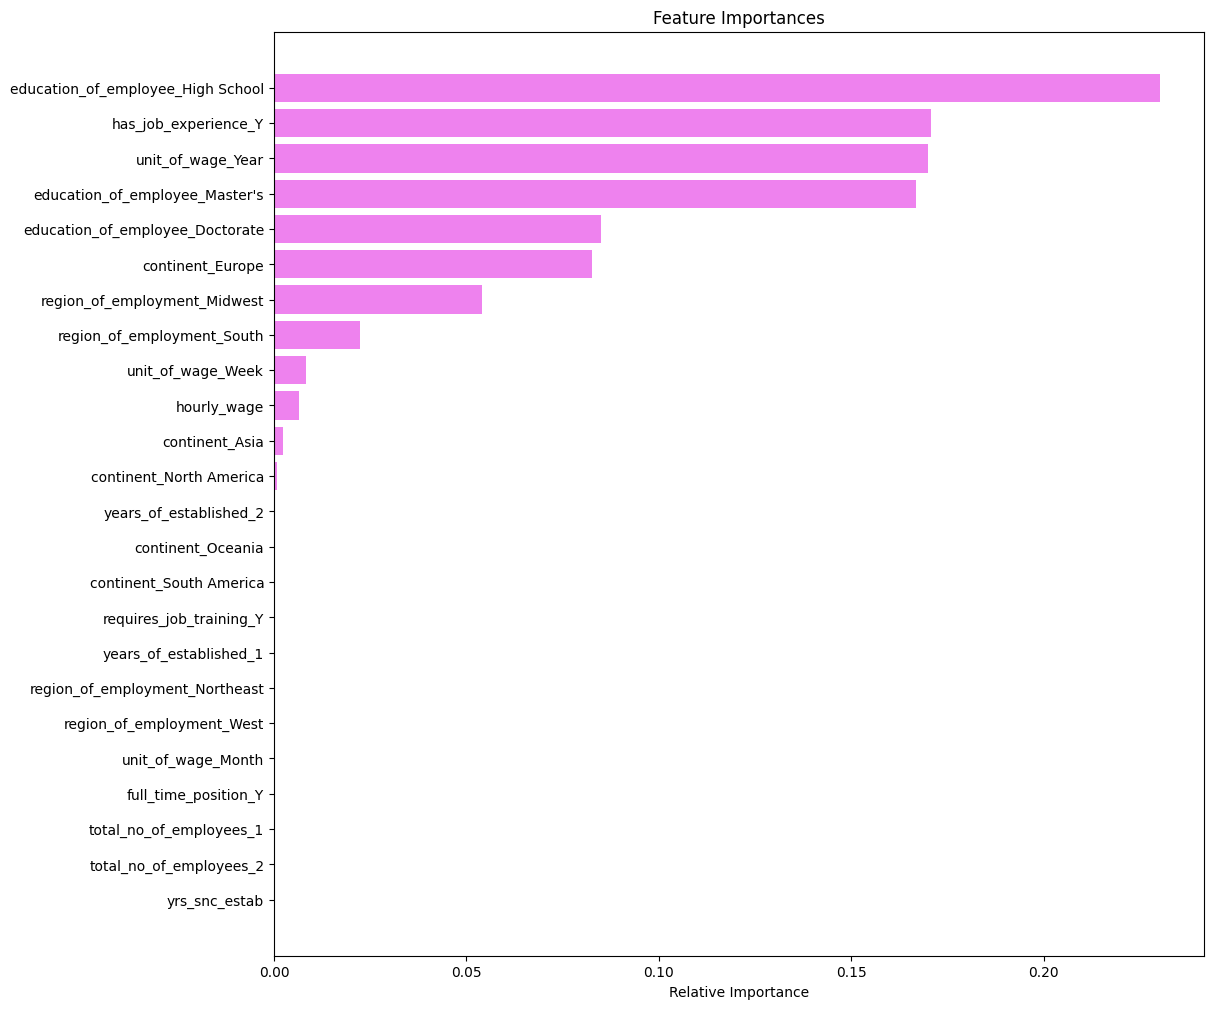

In [93]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that education of employee high school, has job experience yes, unit of wage year, education of employee master are the most important features for making predictions

# Actionable Insights & Recommendations

**Actionable Insights**

Applicant Demographics: A significant proportion of work visa applications (66%) originate from Asia, highlighting the need for tailored recruitment and outreach strategies to this demographic to attract qualified candidates.

Education and Skills: The data shows that 78% of applicants possess at least a bachelor's or master's degree, with higher educational attainment correlating positively with visa certification rates. This indicates that targeting highly educated individuals can improve overall approval rates and enhance the skill level of the workforce.

Experience Matters: With 58% of applicants having prior job experience, it’s evident that experienced candidates are more likely to meet job requirements and have better chances of certification. Companies should prioritize applicants with relevant work history to ensure they meet the job criteria effectively.

Job Nature and Certification Rates: The majority of offered positions (88%) do not require additional training, suggesting that employers prefer candidates who can quickly integrate into their roles. This preference indicates that candidates with a robust skill set and practical experience will likely be favored in the application process.

Regional Trends: Over 81% of offered jobs are concentrated in the Northeast, South, and West regions of the US, with the Midwest showing higher certification rates. Companies should focus their recruitment efforts in these regions to align with job availability and certification likelihood.

Wage Structure Implications: Positions with annual wage units have a higher chance of certification than those with hourly wages. This suggests that companies offering annual salaries may be more appealing to skilled foreign workers, thereby improving their chances of obtaining work visas.

Certification Disparities by Region: The analysis indicates that applicants from different regions have varying certification rates. European applicants exhibit the highest likelihood of certification, while South American applicants face the most challenges. This disparity suggests that regional factors should be considered in recruitment and application strategies.

Impact of Employer Characteristics: The age and size of the sponsoring employer appear to have negligible effects on visa certification likelihood. This insight suggests that other factors, such as job relevance and applicant qualifications, are more critical in the certification process.

Wage Trends: Certified positions typically offer lower average equivalent hourly wages compared to denied applications. This trend could imply that competitive wage offerings might influence certification outcomes positively.

Long-Term Workforce Planning: Given the importance of experience and education, companies can strategically invest in developing partnerships with educational institutions and training programs to build a pipeline of qualified candidates, ensuring that they meet future labor demands effectively.

**Recommendations**

Model Selection: Given its simplicity and interpretability, the Tuned Decision Tree model is recommended to the Office of Foreign Labor Certification (OFLC) as the final classifier. If an ensemble approach is preferred, the Tuned Gradient Boosting model is recommended to reduce bias.

Focus on Key Factors: The OFLC should prioritize applicants based on their education level, job experience, and wage unit when estimating visa certification probabilities. Applicants with higher education, relevant job experience, and annual wage units are more likely to receive certifications. Additionally, applicants from Europe have increased chances of certification in certain contexts.

Prioritize High-Demand Applications: To avoid workforce shortages in the US, especially in industries reliant on foreign employees, it is recommended that the OFLC expedite processing for visa applications that demonstrate a higher likelihood of certification based on the developed classification models.

Streamline Denial Processes: To minimize resource waste, the OFLC could rapidly deny applications predicted to have a very high chance of denial. Such applications could be redirected to a different section for appeal processes initiated by applicants or employers.

Consider Additional Variables: It is recommended to explore other potentially important variables in future classification models, including the applicant's industry of employment (e.g., medical, engineering, finance, agriculture), years of experience, alignment of qualifications with job requirements, and the socioeconomic benefits of the employer to the US.

Experiment with Advanced Models: Exploring more sophisticated machine learning-based classification models is encouraged to enhance predictive accuracy and insights into visa certification processes.

**Conclusion**

By implementing these insights and recommendations, the OFLC can improve its decision-making processes, ensuring a more efficient and equitable visa certification system while addressing labor needs within the United States.